In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"  # specify which GPU(s) to be used

import numpy as np
import torch
import torch.nn as nn
import math
from math import sin

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot

# example of generating random samples from sin(x)
from numpy.random import rand
from numpy import hstack

# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import randn

ModuleNotFoundError: No module named 'keras'

In [2]:
# create a line plot of loss for the gan and save to file
def plot_history(d1_hist, d2_hist, g_hist, a1_hist, a2_hist):
	# plot loss
	pyplot.subplot(2, 1, 1)
	pyplot.plot(d1_hist, label='d-real-loss')
	pyplot.plot(d2_hist, label='d-fake-loss')
	pyplot.plot(g_hist, label='gen-loss')
	pyplot.legend()
	# plot discriminator accuracy
	pyplot.subplot(2, 1, 2)
	pyplot.plot(a1_hist, label='accuracy-real')
	pyplot.plot(a2_hist, label='accuracy-fake')
	pyplot.legend()

# Select a One-Dimensional Function

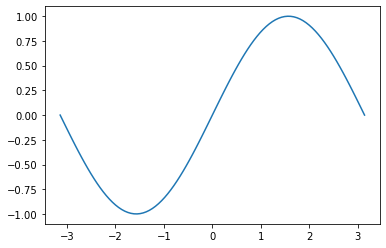

In [3]:
# simple function
def calculate(x):
	return sin(x)
 
# define inputs
inputs = np.linspace(-math.pi, math.pi, 100)
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

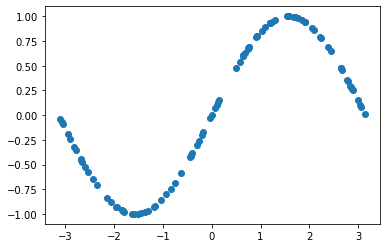

In [4]:
# generate randoms sample from sin(x)
def generate_samples(n=100):
    # generate random inputs in [-pi, pi]
    X1 = 2*math.pi*rand(n) - math.pi
    # generate outputs sin(x)
    X2 = [sin(x) for x in X1]
    X2 = np.array(X2)
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    return hstack((X1, X2))
 
# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

# Define a Discriminator Model

In [3]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [6]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-pi, pi]
	X1 = 2*math.pi*rand(n) - math.pi
	# generate outputs sin(x)
	X2 = [sin(x) for x in X1]
	X2 = np.array(X2)
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-2pi, 2pi]
	X1 = 4*math.pi*rand(n) - 2*math.pi
	# generate outputs in [-2pi, 2pi]
	X2 = 4*math.pi*rand(n) - 2*math.pi
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.046875 0.703125
1 0.09375 0.84375
2 0.078125 0.65625
3 0.078125 0.75
4 0.015625 0.75
5 0.0 0.75
6 0.03125 0.84375
7 0.0 0.765625
8 0.03125 0.78125
9 0.015625 0.78125
10 0.015625 0.875
11 0.03125 0.8125
12 0.0 0.921875
13 0.0 0.796875
14 0.0 0.90625
15 0.0 0.90625
16 0.03125 0.921875
17 0.015625 1.0
18 0.03125 0.984375
19 0.03125 1.0
20 0.046875 1.0
21 0.078125 0.984375
22 0.03125 1.0
23 0.015625 1.0
24 0.078125 1.0
25 0.015625 1.0
26 0.0 1.0
27 0.0625 1.0
28 0.0 1.0
29 0.015625 1.0
30 0.046875 1.0
31 0.015625 0.984375
32 0.0625 1.0
33 0.03125 1.0
34 0.03125 1.0
35 0.015625 1.0
36 0.015625 1.0
37 0.09375 1.0
38 0.03125 1.0
39 0.0625 1.0
40 0.078125 0.984375
41 0.078125 1.0
42 0.03125 1.0
43 0.046875 0.984375
44 0.0 1.0
45 0.03125 0.96875
46 0.046875 0.984375
47 0.015625 1.0
48 0.15625 1.0
49 0.140625 1.0
50 0.203125 0.984375
51 0.140625 1.0
52 0.109375 0.984375
53 0.1875 1.0
54 0.15625 0.984375
55 0.203125 0.9375
56 0.09375 1.0
57 0.234375 0.96875
58 0.203125 0.96875
59 0.265625 0.9

422 1.0 0.859375
423 0.984375 0.84375
424 0.953125 0.875
425 0.984375 0.796875
426 0.953125 0.875
427 0.984375 0.78125
428 1.0 0.8125
429 0.96875 0.765625
430 0.984375 0.796875
431 1.0 0.828125
432 1.0 0.828125
433 1.0 0.84375
434 0.984375 0.828125
435 0.921875 0.78125
436 0.96875 0.734375
437 0.953125 0.78125
438 0.984375 0.875
439 0.96875 0.796875
440 1.0 0.828125
441 0.984375 0.875
442 0.96875 0.8125
443 0.9375 0.90625
444 1.0 0.859375
445 0.984375 0.828125
446 0.96875 0.828125
447 0.984375 0.875
448 0.984375 0.828125
449 0.984375 0.796875
450 0.953125 0.828125
451 1.0 0.890625
452 0.9375 0.90625
453 0.953125 0.890625
454 0.953125 0.765625
455 0.9375 0.828125
456 0.96875 0.78125
457 0.984375 0.796875
458 0.96875 0.8125
459 0.984375 0.84375
460 1.0 0.859375
461 0.96875 0.90625
462 0.96875 0.703125
463 0.96875 0.828125
464 0.953125 0.828125
465 0.953125 0.859375
466 0.984375 0.84375
467 0.953125 0.84375
468 0.984375 0.84375
469 0.953125 0.828125
470 0.984375 0.796875
471 0.984375 0.76

882 1.0 0.921875
883 1.0 0.90625
884 1.0 0.890625
885 1.0 0.90625
886 1.0 0.9375
887 1.0 0.9375
888 1.0 0.953125
889 1.0 0.84375
890 1.0 0.875
891 1.0 0.9375
892 1.0 0.90625
893 1.0 0.828125
894 1.0 0.890625
895 1.0 0.859375
896 1.0 0.875
897 1.0 0.90625
898 1.0 0.859375
899 1.0 0.828125
900 1.0 0.90625
901 1.0 0.84375
902 1.0 0.875
903 1.0 0.90625
904 1.0 0.875
905 1.0 0.890625
906 1.0 0.859375
907 1.0 0.828125
908 1.0 0.875
909 1.0 0.9375
910 1.0 0.859375
911 1.0 0.875
912 1.0 0.875
913 1.0 0.84375
914 1.0 0.859375
915 1.0 0.875
916 1.0 0.890625
917 1.0 0.84375
918 1.0 0.859375
919 1.0 0.890625
920 1.0 0.828125
921 1.0 0.875
922 1.0 0.875
923 1.0 0.90625
924 1.0 0.90625
925 1.0 0.9375
926 1.0 0.90625
927 1.0 0.796875
928 1.0 0.890625
929 1.0 0.8125
930 1.0 0.859375
931 1.0 0.859375
932 1.0 0.8125
933 1.0 0.828125
934 1.0 0.84375
935 1.0 0.921875
936 1.0 0.859375
937 1.0 0.921875
938 1.0 0.84375
939 1.0 0.828125
940 1.0 0.859375
941 1.0 0.78125
942 1.0 0.890625
943 1.0 0.875
944 1.0 0

# Define a Generator Model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


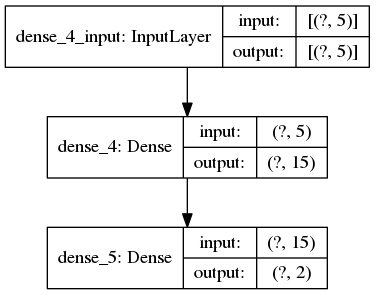

In [7]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the discriminator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

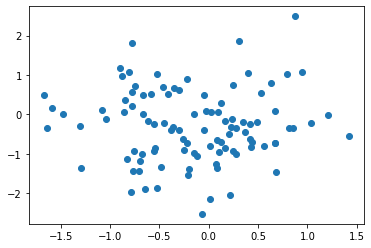

In [8]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()

# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

# Training the Generator Model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


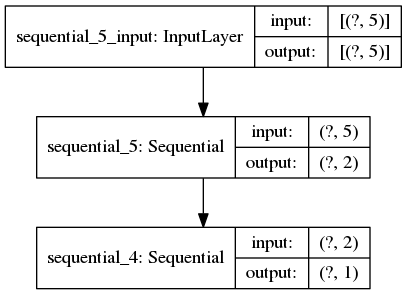

In [9]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [11]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

# Evaluating the Performance of the GAN

In [12]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-pi, pi]
	X1 = 2*math.pi*rand(n) - math.pi
	# generate outputs sin(x)
	X2 = [sin(x) for x in X1]
	X2 = np.array(X2)
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [13]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [14]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

In [15]:
# plot real and fake points
def summarize_performance(generator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

In [16]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

In [17]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=500):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
    # prepare lists for storing stats each iteration
	d1_hist, d2_hist, g_hist, a1_hist, a2_hist = list(), list(), list(), list(), list()
    
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
        # update discriminator model weights
		d_loss1, d_acc1 = d_model.train_on_batch(x_real, y_real)
        
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator model weights
		d_loss2, d_acc2 = d_model.train_on_batch(x_fake, y_fake)
        
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
        
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
        
        # update the generator via the discriminator's error
		g_loss = gan_model.train_on_batch(x_gan, y_gan)
        
		# summarize loss on this batch
		print('>%d, d-real-loss=%.3f, d-fake-loss=%.3f gen-loss=%.3f, acc-real=%d, acc-fake=%d' %
			(i+1, d_loss1, d_loss2, g_loss, int(100*d_acc1), int(100*d_acc2)))
        
        # record history
		d1_hist.append(d_loss1)
		d2_hist.append(d_loss2)
		g_hist.append(g_loss)
		a1_hist.append(d_acc1)
		a2_hist.append(d_acc2)
        
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)
	plot_history(d1_hist, d2_hist, g_hist, a1_hist, a2_hist)

# Complete Example of Training the GAN

>1, d1=0.820, d2=0.825 g=1.051, a1=60, a2=46
>2, d1=0.897, d2=0.698 g=0.934, a1=54, a2=54
>3, d1=1.030, d2=0.818 g=1.058, a1=39, a2=53
>4, d1=0.984, d2=0.847 g=0.916, a1=48, a2=46
>5, d1=0.804, d2=0.873 g=0.932, a1=54, a2=48
>6, d1=0.870, d2=0.710 g=1.000, a1=51, a2=48
>7, d1=0.876, d2=0.738 g=0.830, a1=46, a2=53
>8, d1=0.849, d2=0.836 g=0.856, a1=50, a2=43
>9, d1=0.852, d2=0.813 g=0.829, a1=50, a2=37
>10, d1=0.937, d2=0.736 g=0.722, a1=42, a2=46
>11, d1=0.743, d2=0.754 g=0.659, a1=53, a2=48
>12, d1=0.946, d2=0.891 g=0.709, a1=37, a2=34
>13, d1=0.777, d2=0.884 g=0.793, a1=46, a2=40
>14, d1=0.762, d2=0.834 g=0.726, a1=46, a2=43
>15, d1=0.669, d2=0.785 g=0.745, a1=54, a2=40
>16, d1=0.666, d2=0.836 g=0.691, a1=50, a2=31
>17, d1=0.694, d2=0.947 g=0.682, a1=46, a2=28
>18, d1=0.732, d2=0.901 g=0.667, a1=45, a2=25
>19, d1=0.732, d2=0.899 g=0.691, a1=43, a2=34
>20, d1=0.669, d2=0.817 g=0.695, a1=48, a2=35
>21, d1=0.602, d2=0.795 g=0.675, a1=57, a2=32
>22, d1=0.625, d2=0.796 g=0.673, a1=50, a2=

>178, d1=0.743, d2=0.696 g=0.715, a1=42, a2=56
>179, d1=0.755, d2=0.662 g=0.744, a1=37, a2=65
>180, d1=0.748, d2=0.669 g=0.750, a1=26, a2=65
>181, d1=0.748, d2=0.658 g=0.736, a1=35, a2=65
>182, d1=0.788, d2=0.655 g=0.729, a1=20, a2=70
>183, d1=0.768, d2=0.663 g=0.735, a1=28, a2=64
>184, d1=0.764, d2=0.674 g=0.743, a1=23, a2=56
>185, d1=0.744, d2=0.662 g=0.735, a1=29, a2=65
>186, d1=0.754, d2=0.678 g=0.734, a1=15, a2=54
>187, d1=0.763, d2=0.654 g=0.733, a1=20, a2=68
>188, d1=0.752, d2=0.664 g=0.740, a1=20, a2=60
>189, d1=0.756, d2=0.671 g=0.745, a1=23, a2=57
>190, d1=0.769, d2=0.651 g=0.749, a1=12, a2=67
>191, d1=0.762, d2=0.664 g=0.747, a1=15, a2=64
>192, d1=0.761, d2=0.635 g=0.740, a1=12, a2=79
>193, d1=0.782, d2=0.647 g=0.745, a1=7, a2=71
>194, d1=0.767, d2=0.659 g=0.753, a1=10, a2=70
>195, d1=0.786, d2=0.647 g=0.749, a1=3, a2=71
>196, d1=0.763, d2=0.647 g=0.760, a1=9, a2=76
>197, d1=0.783, d2=0.636 g=0.760, a1=0, a2=87
>198, d1=0.782, d2=0.634 g=0.765, a1=0, a2=95
>199, d1=0.781, d2

>354, d1=0.685, d2=0.684 g=0.702, a1=45, a2=59
>355, d1=0.685, d2=0.686 g=0.708, a1=51, a2=60
>356, d1=0.682, d2=0.687 g=0.708, a1=56, a2=53
>357, d1=0.691, d2=0.687 g=0.708, a1=40, a2=46
>358, d1=0.686, d2=0.681 g=0.705, a1=48, a2=59
>359, d1=0.684, d2=0.668 g=0.712, a1=45, a2=70
>360, d1=0.684, d2=0.679 g=0.703, a1=50, a2=64
>361, d1=0.684, d2=0.687 g=0.721, a1=48, a2=53
>362, d1=0.690, d2=0.671 g=0.708, a1=43, a2=65
>363, d1=0.687, d2=0.677 g=0.714, a1=51, a2=59
>364, d1=0.685, d2=0.676 g=0.716, a1=50, a2=62
>365, d1=0.678, d2=0.678 g=0.716, a1=54, a2=62
>366, d1=0.680, d2=0.686 g=0.713, a1=56, a2=57
>367, d1=0.677, d2=0.672 g=0.709, a1=53, a2=59
>368, d1=0.680, d2=0.675 g=0.702, a1=57, a2=67
>369, d1=0.682, d2=0.689 g=0.704, a1=60, a2=51
>370, d1=0.668, d2=0.706 g=0.707, a1=60, a2=43
>371, d1=0.672, d2=0.683 g=0.698, a1=67, a2=57
>372, d1=0.675, d2=0.690 g=0.690, a1=51, a2=46
>373, d1=0.672, d2=0.691 g=0.698, a1=59, a2=51
>374, d1=0.676, d2=0.694 g=0.698, a1=56, a2=48
>375, d1=0.67

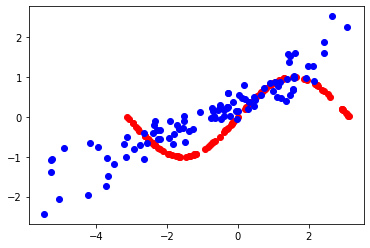

>501, d1=0.704, d2=0.700 g=0.678, a1=55, a2=64
>502, d1=0.666, d2=0.697 g=0.708, a1=65, a2=59
>503, d1=0.698, d2=0.710 g=0.697, a1=48, a2=54
>504, d1=0.694, d2=0.701 g=0.701, a1=53, a2=54
>505, d1=0.713, d2=0.682 g=0.704, a1=46, a2=65
>506, d1=0.717, d2=0.653 g=0.715, a1=46, a2=67
>507, d1=0.706, d2=0.689 g=0.733, a1=53, a2=54
>508, d1=0.735, d2=0.686 g=0.744, a1=42, a2=46
>509, d1=0.731, d2=0.689 g=0.753, a1=46, a2=54
>510, d1=0.745, d2=0.695 g=0.739, a1=39, a2=50
>511, d1=0.738, d2=0.657 g=0.743, a1=42, a2=60
>512, d1=0.721, d2=0.704 g=0.726, a1=53, a2=35
>513, d1=0.693, d2=0.656 g=0.744, a1=64, a2=62
>514, d1=0.715, d2=0.658 g=0.749, a1=51, a2=54
>515, d1=0.711, d2=0.664 g=0.746, a1=56, a2=51
>516, d1=0.711, d2=0.641 g=0.741, a1=54, a2=68
>517, d1=0.714, d2=0.651 g=0.760, a1=50, a2=57
>518, d1=0.732, d2=0.648 g=0.756, a1=37, a2=64
>519, d1=0.701, d2=0.633 g=0.746, a1=59, a2=71
>520, d1=0.705, d2=0.643 g=0.752, a1=51, a2=64
>521, d1=0.718, d2=0.653 g=0.747, a1=43, a2=60
>522, d1=0.71

>850, d1=0.673, d2=0.659 g=0.737, a1=42, a2=81
>851, d1=0.684, d2=0.655 g=0.732, a1=32, a2=87
>852, d1=0.688, d2=0.664 g=0.723, a1=35, a2=73
>853, d1=0.685, d2=0.667 g=0.731, a1=31, a2=70
>854, d1=0.645, d2=0.665 g=0.726, a1=48, a2=73
>855, d1=0.679, d2=0.669 g=0.715, a1=37, a2=68
>856, d1=0.680, d2=0.681 g=0.722, a1=31, a2=64
>857, d1=0.667, d2=0.663 g=0.712, a1=40, a2=75
>858, d1=0.666, d2=0.659 g=0.723, a1=37, a2=79
>859, d1=0.689, d2=0.683 g=0.728, a1=31, a2=65
>860, d1=0.677, d2=0.682 g=0.710, a1=43, a2=65
>861, d1=0.715, d2=0.686 g=0.710, a1=23, a2=64
>862, d1=0.676, d2=0.715 g=0.696, a1=45, a2=56
>863, d1=0.679, d2=0.684 g=0.701, a1=43, a2=57
>864, d1=0.681, d2=0.709 g=0.694, a1=37, a2=59
>865, d1=0.689, d2=0.705 g=0.704, a1=32, a2=53
>866, d1=0.700, d2=0.725 g=0.706, a1=32, a2=50
>867, d1=0.704, d2=0.701 g=0.697, a1=26, a2=48
>868, d1=0.710, d2=0.698 g=0.711, a1=29, a2=51
>869, d1=0.704, d2=0.694 g=0.704, a1=32, a2=57
>870, d1=0.706, d2=0.692 g=0.716, a1=34, a2=59
>871, d1=0.71

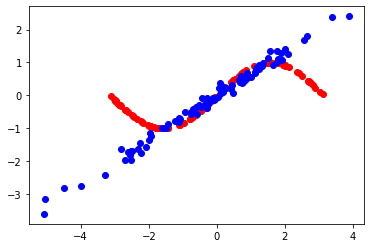

>1001, d1=0.652, d2=0.658 g=0.736, a1=75, a2=89
>1002, d1=0.663, d2=0.647 g=0.733, a1=48, a2=90
>1003, d1=0.685, d2=0.657 g=0.740, a1=34, a2=90
>1004, d1=0.677, d2=0.662 g=0.734, a1=37, a2=79
>1005, d1=0.670, d2=0.656 g=0.739, a1=50, a2=90
>1006, d1=0.661, d2=0.661 g=0.733, a1=48, a2=92
>1007, d1=0.677, d2=0.657 g=0.738, a1=39, a2=89
>1008, d1=0.665, d2=0.665 g=0.737, a1=56, a2=84
>1009, d1=0.691, d2=0.662 g=0.724, a1=31, a2=81
>1010, d1=0.663, d2=0.663 g=0.722, a1=45, a2=84
>1011, d1=0.676, d2=0.666 g=0.721, a1=51, a2=82
>1012, d1=0.660, d2=0.667 g=0.720, a1=45, a2=84
>1013, d1=0.695, d2=0.679 g=0.718, a1=31, a2=68
>1014, d1=0.664, d2=0.676 g=0.714, a1=50, a2=73
>1015, d1=0.673, d2=0.678 g=0.708, a1=42, a2=75
>1016, d1=0.655, d2=0.682 g=0.698, a1=51, a2=62
>1017, d1=0.678, d2=0.695 g=0.701, a1=42, a2=50
>1018, d1=0.683, d2=0.695 g=0.700, a1=35, a2=48
>1019, d1=0.674, d2=0.701 g=0.696, a1=50, a2=48
>1020, d1=0.682, d2=0.689 g=0.695, a1=43, a2=53
>1021, d1=0.667, d2=0.696 g=0.689, a1=50

>1172, d1=0.656, d2=0.702 g=0.685, a1=50, a2=48
>1173, d1=0.645, d2=0.698 g=0.685, a1=51, a2=45
>1174, d1=0.661, d2=0.703 g=0.688, a1=50, a2=46
>1175, d1=0.663, d2=0.703 g=0.686, a1=40, a2=43
>1176, d1=0.666, d2=0.708 g=0.686, a1=45, a2=40
>1177, d1=0.665, d2=0.710 g=0.682, a1=45, a2=40
>1178, d1=0.668, d2=0.713 g=0.677, a1=43, a2=43
>1179, d1=0.683, d2=0.716 g=0.678, a1=42, a2=40
>1180, d1=0.693, d2=0.724 g=0.680, a1=37, a2=31
>1181, d1=0.720, d2=0.715 g=0.686, a1=28, a2=46
>1182, d1=0.682, d2=0.716 g=0.665, a1=37, a2=37
>1183, d1=0.707, d2=0.732 g=0.671, a1=28, a2=42
>1184, d1=0.702, d2=0.721 g=0.665, a1=39, a2=45
>1185, d1=0.717, d2=0.722 g=0.666, a1=29, a2=39
>1186, d1=0.706, d2=0.721 g=0.661, a1=32, a2=34
>1187, d1=0.714, d2=0.734 g=0.659, a1=29, a2=21
>1188, d1=0.720, d2=0.727 g=0.678, a1=29, a2=31
>1189, d1=0.724, d2=0.713 g=0.680, a1=29, a2=40
>1190, d1=0.731, d2=0.711 g=0.670, a1=26, a2=40
>1191, d1=0.737, d2=0.709 g=0.694, a1=20, a2=40
>1192, d1=0.739, d2=0.703 g=0.688, a1=26

>1343, d1=0.714, d2=0.743 g=0.676, a1=29, a2=15
>1344, d1=0.729, d2=0.724 g=0.679, a1=25, a2=25
>1345, d1=0.718, d2=0.702 g=0.682, a1=29, a2=45
>1346, d1=0.735, d2=0.707 g=0.692, a1=29, a2=46
>1347, d1=0.740, d2=0.714 g=0.685, a1=26, a2=42
>1348, d1=0.730, d2=0.691 g=0.694, a1=31, a2=56
>1349, d1=0.754, d2=0.690 g=0.702, a1=15, a2=60
>1350, d1=0.757, d2=0.683 g=0.699, a1=20, a2=57
>1351, d1=0.765, d2=0.687 g=0.703, a1=14, a2=60
>1352, d1=0.761, d2=0.686 g=0.713, a1=15, a2=56
>1353, d1=0.767, d2=0.679 g=0.714, a1=9, a2=75
>1354, d1=0.763, d2=0.673 g=0.718, a1=18, a2=78
>1355, d1=0.771, d2=0.674 g=0.721, a1=10, a2=70
>1356, d1=0.759, d2=0.660 g=0.725, a1=17, a2=81
>1357, d1=0.768, d2=0.664 g=0.735, a1=12, a2=85
>1358, d1=0.774, d2=0.657 g=0.743, a1=9, a2=82
>1359, d1=0.782, d2=0.647 g=0.748, a1=12, a2=93
>1360, d1=0.774, d2=0.644 g=0.752, a1=7, a2=98
>1361, d1=0.760, d2=0.640 g=0.747, a1=12, a2=93
>1362, d1=0.766, d2=0.640 g=0.759, a1=9, a2=96
>1363, d1=0.756, d2=0.628 g=0.760, a1=15, a2

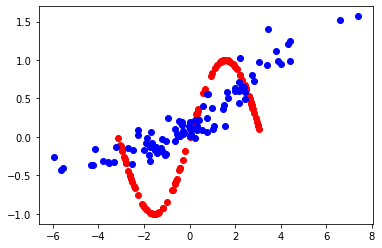

>1501, d1=0.726, d2=0.732 g=0.673, a1=43, a2=42
>1502, d1=0.730, d2=0.725 g=0.682, a1=21, a2=46
>1503, d1=0.746, d2=0.714 g=0.686, a1=23, a2=34
>1504, d1=0.746, d2=0.705 g=0.688, a1=20, a2=40
>1505, d1=0.748, d2=0.692 g=0.693, a1=20, a2=57
>1506, d1=0.760, d2=0.693 g=0.694, a1=15, a2=51
>1507, d1=0.749, d2=0.689 g=0.707, a1=15, a2=59
>1508, d1=0.748, d2=0.682 g=0.702, a1=17, a2=70
>1509, d1=0.747, d2=0.676 g=0.710, a1=17, a2=75
>1510, d1=0.758, d2=0.680 g=0.717, a1=7, a2=68
>1511, d1=0.759, d2=0.676 g=0.724, a1=14, a2=78
>1512, d1=0.761, d2=0.663 g=0.730, a1=4, a2=95
>1513, d1=0.767, d2=0.652 g=0.734, a1=10, a2=93
>1514, d1=0.761, d2=0.654 g=0.753, a1=10, a2=84
>1515, d1=0.752, d2=0.645 g=0.744, a1=4, a2=87
>1516, d1=0.771, d2=0.645 g=0.759, a1=4, a2=84
>1517, d1=0.761, d2=0.636 g=0.777, a1=3, a2=93
>1518, d1=0.775, d2=0.617 g=0.756, a1=4, a2=100
>1519, d1=0.761, d2=0.630 g=0.765, a1=7, a2=98
>1520, d1=0.764, d2=0.616 g=0.781, a1=3, a2=100
>1521, d1=0.763, d2=0.617 g=0.791, a1=7, a2=10

>1672, d1=0.738, d2=0.637 g=0.751, a1=31, a2=75
>1673, d1=0.724, d2=0.631 g=0.753, a1=29, a2=81
>1674, d1=0.732, d2=0.652 g=0.760, a1=29, a2=81
>1675, d1=0.740, d2=0.634 g=0.751, a1=26, a2=76
>1676, d1=0.730, d2=0.642 g=0.756, a1=31, a2=78
>1677, d1=0.717, d2=0.654 g=0.763, a1=43, a2=90
>1678, d1=0.731, d2=0.648 g=0.768, a1=21, a2=92
>1679, d1=0.717, d2=0.636 g=0.757, a1=23, a2=96
>1680, d1=0.732, d2=0.629 g=0.758, a1=15, a2=95
>1681, d1=0.716, d2=0.636 g=0.763, a1=26, a2=98
>1682, d1=0.723, d2=0.630 g=0.758, a1=23, a2=96
>1683, d1=0.709, d2=0.628 g=0.760, a1=26, a2=96
>1684, d1=0.703, d2=0.630 g=0.760, a1=28, a2=96
>1685, d1=0.705, d2=0.627 g=0.769, a1=34, a2=93
>1686, d1=0.705, d2=0.627 g=0.768, a1=40, a2=93
>1687, d1=0.700, d2=0.621 g=0.777, a1=53, a2=92
>1688, d1=0.727, d2=0.621 g=0.773, a1=29, a2=96
>1689, d1=0.704, d2=0.616 g=0.778, a1=57, a2=100
>1690, d1=0.716, d2=0.613 g=0.780, a1=45, a2=100
>1691, d1=0.704, d2=0.621 g=0.778, a1=48, a2=96
>1692, d1=0.701, d2=0.617 g=0.769, a1=

>1843, d1=0.740, d2=0.609 g=0.792, a1=32, a2=96
>1844, d1=0.716, d2=0.610 g=0.782, a1=39, a2=96
>1845, d1=0.724, d2=0.623 g=0.782, a1=40, a2=98
>1846, d1=0.716, d2=0.612 g=0.779, a1=51, a2=96
>1847, d1=0.724, d2=0.626 g=0.769, a1=42, a2=90
>1848, d1=0.694, d2=0.620 g=0.766, a1=56, a2=95
>1849, d1=0.701, d2=0.628 g=0.774, a1=53, a2=95
>1850, d1=0.694, d2=0.623 g=0.763, a1=50, a2=98
>1851, d1=0.692, d2=0.636 g=0.772, a1=60, a2=90
>1852, d1=0.693, d2=0.627 g=0.762, a1=60, a2=96
>1853, d1=0.716, d2=0.625 g=0.753, a1=46, a2=96
>1854, d1=0.707, d2=0.638 g=0.759, a1=50, a2=92
>1855, d1=0.697, d2=0.635 g=0.753, a1=57, a2=100
>1856, d1=0.692, d2=0.645 g=0.743, a1=53, a2=84
>1857, d1=0.675, d2=0.648 g=0.751, a1=70, a2=89
>1858, d1=0.686, d2=0.641 g=0.739, a1=65, a2=90
>1859, d1=0.687, d2=0.657 g=0.741, a1=60, a2=82
>1860, d1=0.688, d2=0.649 g=0.740, a1=64, a2=84
>1861, d1=0.686, d2=0.657 g=0.736, a1=60, a2=84
>1862, d1=0.684, d2=0.658 g=0.730, a1=65, a2=84
>1863, d1=0.700, d2=0.656 g=0.728, a1=5

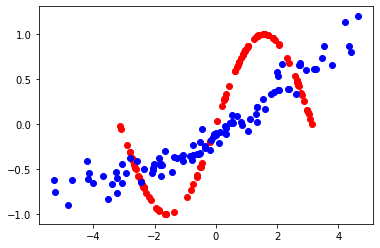

>2001, d1=0.646, d2=0.621 g=0.776, a1=79, a2=100
>2002, d1=0.709, d2=0.615 g=0.784, a1=46, a2=100
>2003, d1=0.708, d2=0.612 g=0.788, a1=51, a2=95
>2004, d1=0.688, d2=0.622 g=0.782, a1=62, a2=96
>2005, d1=0.698, d2=0.622 g=0.780, a1=51, a2=98
>2006, d1=0.699, d2=0.619 g=0.789, a1=60, a2=100
>2007, d1=0.690, d2=0.627 g=0.779, a1=60, a2=100
>2008, d1=0.720, d2=0.619 g=0.776, a1=32, a2=93
>2009, d1=0.708, d2=0.622 g=0.772, a1=50, a2=98
>2010, d1=0.698, d2=0.613 g=0.773, a1=56, a2=96
>2011, d1=0.709, d2=0.630 g=0.769, a1=57, a2=98
>2012, d1=0.720, d2=0.635 g=0.777, a1=43, a2=89
>2013, d1=0.695, d2=0.621 g=0.769, a1=53, a2=98
>2014, d1=0.689, d2=0.638 g=0.760, a1=62, a2=95
>2015, d1=0.711, d2=0.645 g=0.751, a1=48, a2=90
>2016, d1=0.705, d2=0.651 g=0.749, a1=43, a2=85
>2017, d1=0.672, d2=0.648 g=0.738, a1=60, a2=90
>2018, d1=0.671, d2=0.656 g=0.733, a1=67, a2=90
>2019, d1=0.680, d2=0.651 g=0.736, a1=60, a2=90
>2020, d1=0.681, d2=0.653 g=0.738, a1=62, a2=90
>2021, d1=0.676, d2=0.659 g=0.722, a

>2172, d1=0.687, d2=0.639 g=0.749, a1=71, a2=79
>2173, d1=0.681, d2=0.626 g=0.748, a1=67, a2=87
>2174, d1=0.679, d2=0.666 g=0.735, a1=67, a2=64
>2175, d1=0.696, d2=0.654 g=0.749, a1=62, a2=67
>2176, d1=0.680, d2=0.647 g=0.745, a1=68, a2=73
>2177, d1=0.678, d2=0.647 g=0.726, a1=75, a2=84
>2178, d1=0.699, d2=0.670 g=0.729, a1=53, a2=65
>2179, d1=0.654, d2=0.679 g=0.729, a1=78, a2=60
>2180, d1=0.694, d2=0.661 g=0.727, a1=60, a2=71
>2181, d1=0.701, d2=0.669 g=0.716, a1=64, a2=65
>2182, d1=0.681, d2=0.687 g=0.711, a1=70, a2=57
>2183, d1=0.700, d2=0.681 g=0.720, a1=65, a2=64
>2184, d1=0.666, d2=0.699 g=0.704, a1=73, a2=40
>2185, d1=0.696, d2=0.687 g=0.702, a1=60, a2=50
>2186, d1=0.694, d2=0.691 g=0.698, a1=62, a2=48
>2187, d1=0.690, d2=0.691 g=0.697, a1=64, a2=43
>2188, d1=0.672, d2=0.693 g=0.700, a1=79, a2=42
>2189, d1=0.674, d2=0.697 g=0.706, a1=71, a2=40
>2190, d1=0.675, d2=0.694 g=0.695, a1=71, a2=53
>2191, d1=0.684, d2=0.698 g=0.685, a1=65, a2=51
>2192, d1=0.682, d2=0.701 g=0.689, a1=64

>2343, d1=0.677, d2=0.697 g=0.706, a1=56, a2=43
>2344, d1=0.665, d2=0.690 g=0.694, a1=64, a2=51
>2345, d1=0.675, d2=0.688 g=0.684, a1=56, a2=45
>2346, d1=0.682, d2=0.693 g=0.694, a1=62, a2=43
>2347, d1=0.672, d2=0.681 g=0.689, a1=60, a2=50
>2348, d1=0.671, d2=0.693 g=0.681, a1=60, a2=45
>2349, d1=0.683, d2=0.698 g=0.690, a1=53, a2=43
>2350, d1=0.681, d2=0.690 g=0.689, a1=53, a2=45
>2351, d1=0.678, d2=0.696 g=0.681, a1=56, a2=45
>2352, d1=0.693, d2=0.703 g=0.690, a1=45, a2=42
>2353, d1=0.680, d2=0.719 g=0.672, a1=62, a2=29
>2354, d1=0.668, d2=0.706 g=0.690, a1=79, a2=39
>2355, d1=0.674, d2=0.703 g=0.685, a1=68, a2=40
>2356, d1=0.680, d2=0.720 g=0.673, a1=67, a2=34
>2357, d1=0.669, d2=0.717 g=0.681, a1=73, a2=37
>2358, d1=0.669, d2=0.695 g=0.670, a1=65, a2=40
>2359, d1=0.664, d2=0.706 g=0.669, a1=71, a2=40
>2360, d1=0.656, d2=0.725 g=0.673, a1=79, a2=23
>2361, d1=0.665, d2=0.730 g=0.683, a1=71, a2=25
>2362, d1=0.643, d2=0.725 g=0.673, a1=92, a2=28
>2363, d1=0.660, d2=0.706 g=0.677, a1=81

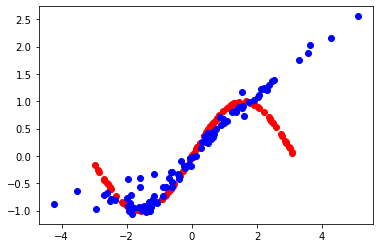

>2501, d1=0.682, d2=0.656 g=0.727, a1=54, a2=65
>2502, d1=0.707, d2=0.667 g=0.729, a1=51, a2=64
>2503, d1=0.705, d2=0.677 g=0.711, a1=51, a2=54
>2504, d1=0.697, d2=0.652 g=0.717, a1=51, a2=60
>2505, d1=0.700, d2=0.681 g=0.708, a1=50, a2=45
>2506, d1=0.697, d2=0.690 g=0.702, a1=51, a2=48
>2507, d1=0.690, d2=0.695 g=0.685, a1=56, a2=40
>2508, d1=0.691, d2=0.707 g=0.676, a1=53, a2=42
>2509, d1=0.693, d2=0.717 g=0.689, a1=62, a2=37
>2510, d1=0.696, d2=0.722 g=0.677, a1=57, a2=31
>2511, d1=0.674, d2=0.713 g=0.682, a1=73, a2=32
>2512, d1=0.683, d2=0.735 g=0.687, a1=71, a2=29
>2513, d1=0.677, d2=0.706 g=0.678, a1=75, a2=40
>2514, d1=0.691, d2=0.715 g=0.687, a1=60, a2=40
>2515, d1=0.676, d2=0.722 g=0.684, a1=71, a2=32
>2516, d1=0.688, d2=0.723 g=0.667, a1=65, a2=31
>2517, d1=0.679, d2=0.714 g=0.695, a1=67, a2=29
>2518, d1=0.693, d2=0.723 g=0.669, a1=57, a2=32
>2519, d1=0.687, d2=0.720 g=0.685, a1=62, a2=34
>2520, d1=0.674, d2=0.719 g=0.687, a1=67, a2=39
>2521, d1=0.675, d2=0.707 g=0.684, a1=59

>2672, d1=0.686, d2=0.670 g=0.705, a1=56, a2=57
>2673, d1=0.693, d2=0.694 g=0.696, a1=43, a2=39
>2674, d1=0.681, d2=0.691 g=0.720, a1=56, a2=53
>2675, d1=0.699, d2=0.681 g=0.720, a1=39, a2=48
>2676, d1=0.690, d2=0.663 g=0.706, a1=50, a2=57
>2677, d1=0.711, d2=0.686 g=0.685, a1=35, a2=54
>2678, d1=0.695, d2=0.710 g=0.685, a1=46, a2=35
>2679, d1=0.675, d2=0.717 g=0.681, a1=62, a2=23
>2680, d1=0.681, d2=0.696 g=0.676, a1=62, a2=48
>2681, d1=0.671, d2=0.722 g=0.674, a1=68, a2=31
>2682, d1=0.670, d2=0.721 g=0.679, a1=68, a2=28
>2683, d1=0.672, d2=0.716 g=0.676, a1=68, a2=31
>2684, d1=0.675, d2=0.728 g=0.685, a1=64, a2=26
>2685, d1=0.672, d2=0.721 g=0.669, a1=68, a2=35
>2686, d1=0.675, d2=0.720 g=0.670, a1=64, a2=31
>2687, d1=0.663, d2=0.735 g=0.676, a1=75, a2=25
>2688, d1=0.673, d2=0.740 g=0.662, a1=68, a2=23
>2689, d1=0.657, d2=0.745 g=0.670, a1=76, a2=21
>2690, d1=0.661, d2=0.729 g=0.674, a1=76, a2=25
>2691, d1=0.659, d2=0.745 g=0.673, a1=84, a2=23
>2692, d1=0.651, d2=0.729 g=0.652, a1=82

>2843, d1=0.707, d2=0.662 g=0.704, a1=43, a2=70
>2844, d1=0.707, d2=0.665 g=0.732, a1=39, a2=68
>2845, d1=0.699, d2=0.680 g=0.700, a1=45, a2=53
>2846, d1=0.691, d2=0.702 g=0.709, a1=50, a2=42
>2847, d1=0.696, d2=0.704 g=0.689, a1=45, a2=37
>2848, d1=0.705, d2=0.688 g=0.695, a1=34, a2=50
>2849, d1=0.693, d2=0.711 g=0.680, a1=45, a2=37
>2850, d1=0.677, d2=0.709 g=0.687, a1=54, a2=43
>2851, d1=0.674, d2=0.694 g=0.684, a1=51, a2=48
>2852, d1=0.675, d2=0.711 g=0.684, a1=62, a2=42
>2853, d1=0.664, d2=0.706 g=0.677, a1=67, a2=45
>2854, d1=0.664, d2=0.710 g=0.679, a1=68, a2=46
>2855, d1=0.661, d2=0.705 g=0.684, a1=64, a2=50
>2856, d1=0.669, d2=0.718 g=0.685, a1=60, a2=40
>2857, d1=0.661, d2=0.740 g=0.672, a1=73, a2=23
>2858, d1=0.665, d2=0.727 g=0.662, a1=73, a2=28
>2859, d1=0.659, d2=0.713 g=0.664, a1=78, a2=35
>2860, d1=0.659, d2=0.722 g=0.666, a1=76, a2=28
>2861, d1=0.651, d2=0.724 g=0.666, a1=85, a2=28
>2862, d1=0.658, d2=0.731 g=0.668, a1=87, a2=21
>2863, d1=0.654, d2=0.718 g=0.657, a1=82

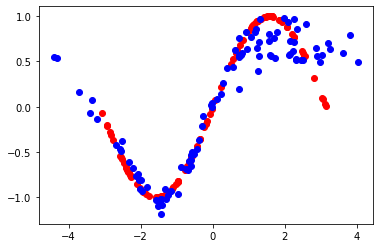

>3001, d1=0.679, d2=0.644 g=0.729, a1=65, a2=82
>3002, d1=0.705, d2=0.650 g=0.725, a1=45, a2=84
>3003, d1=0.701, d2=0.666 g=0.737, a1=46, a2=76
>3004, d1=0.718, d2=0.676 g=0.726, a1=32, a2=62
>3005, d1=0.709, d2=0.658 g=0.734, a1=42, a2=71
>3006, d1=0.715, d2=0.673 g=0.729, a1=37, a2=71
>3007, d1=0.722, d2=0.665 g=0.724, a1=25, a2=73
>3008, d1=0.717, d2=0.666 g=0.735, a1=34, a2=71
>3009, d1=0.704, d2=0.660 g=0.729, a1=42, a2=64
>3010, d1=0.705, d2=0.674 g=0.720, a1=40, a2=64
>3011, d1=0.711, d2=0.669 g=0.721, a1=40, a2=73
>3012, d1=0.704, d2=0.669 g=0.731, a1=37, a2=59
>3013, d1=0.710, d2=0.665 g=0.728, a1=29, a2=73
>3014, d1=0.695, d2=0.655 g=0.708, a1=51, a2=73
>3015, d1=0.699, d2=0.684 g=0.716, a1=46, a2=56
>3016, d1=0.702, d2=0.666 g=0.700, a1=51, a2=70
>3017, d1=0.705, d2=0.673 g=0.717, a1=43, a2=64
>3018, d1=0.687, d2=0.671 g=0.709, a1=59, a2=62
>3019, d1=0.698, d2=0.678 g=0.707, a1=46, a2=60
>3020, d1=0.695, d2=0.683 g=0.714, a1=57, a2=48
>3021, d1=0.693, d2=0.695 g=0.715, a1=56

>3172, d1=0.697, d2=0.681 g=0.704, a1=53, a2=60
>3173, d1=0.701, d2=0.681 g=0.704, a1=45, a2=60
>3174, d1=0.706, d2=0.685 g=0.706, a1=32, a2=60
>3175, d1=0.691, d2=0.680 g=0.699, a1=60, a2=60
>3176, d1=0.706, d2=0.683 g=0.687, a1=51, a2=51
>3177, d1=0.684, d2=0.686 g=0.695, a1=70, a2=48
>3178, d1=0.683, d2=0.688 g=0.694, a1=75, a2=46
>3179, d1=0.696, d2=0.697 g=0.692, a1=54, a2=37
>3180, d1=0.698, d2=0.688 g=0.693, a1=57, a2=50
>3181, d1=0.683, d2=0.690 g=0.693, a1=75, a2=48
>3182, d1=0.689, d2=0.695 g=0.690, a1=68, a2=42
>3183, d1=0.692, d2=0.702 g=0.695, a1=62, a2=43
>3184, d1=0.695, d2=0.694 g=0.686, a1=53, a2=50
>3185, d1=0.683, d2=0.695 g=0.702, a1=60, a2=51
>3186, d1=0.674, d2=0.684 g=0.679, a1=75, a2=59
>3187, d1=0.696, d2=0.690 g=0.692, a1=51, a2=60
>3188, d1=0.685, d2=0.692 g=0.697, a1=62, a2=53
>3189, d1=0.686, d2=0.701 g=0.695, a1=62, a2=40
>3190, d1=0.695, d2=0.697 g=0.699, a1=54, a2=50
>3191, d1=0.687, d2=0.700 g=0.696, a1=59, a2=53
>3192, d1=0.693, d2=0.678 g=0.695, a1=51

>3343, d1=0.695, d2=0.685 g=0.698, a1=64, a2=48
>3344, d1=0.698, d2=0.690 g=0.697, a1=67, a2=42
>3345, d1=0.704, d2=0.688 g=0.708, a1=60, a2=45
>3346, d1=0.700, d2=0.686 g=0.707, a1=54, a2=51
>3347, d1=0.699, d2=0.675 g=0.701, a1=60, a2=54
>3348, d1=0.698, d2=0.680 g=0.707, a1=62, a2=50
>3349, d1=0.705, d2=0.683 g=0.700, a1=56, a2=51
>3350, d1=0.698, d2=0.687 g=0.706, a1=64, a2=48
>3351, d1=0.707, d2=0.685 g=0.714, a1=53, a2=46
>3352, d1=0.703, d2=0.684 g=0.712, a1=57, a2=43
>3353, d1=0.704, d2=0.676 g=0.712, a1=45, a2=62
>3354, d1=0.703, d2=0.670 g=0.711, a1=57, a2=59
>3355, d1=0.708, d2=0.680 g=0.706, a1=45, a2=53
>3356, d1=0.691, d2=0.677 g=0.703, a1=67, a2=57
>3357, d1=0.692, d2=0.691 g=0.710, a1=68, a2=45
>3358, d1=0.701, d2=0.688 g=0.699, a1=57, a2=46
>3359, d1=0.698, d2=0.691 g=0.707, a1=59, a2=42
>3360, d1=0.698, d2=0.679 g=0.715, a1=57, a2=60
>3361, d1=0.693, d2=0.675 g=0.708, a1=53, a2=62
>3362, d1=0.697, d2=0.692 g=0.703, a1=56, a2=46
>3363, d1=0.702, d2=0.687 g=0.705, a1=50

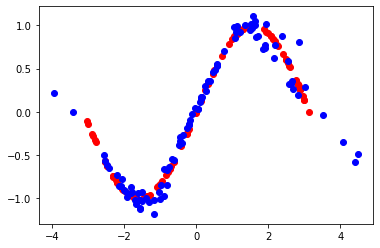

>3501, d1=0.684, d2=0.693 g=0.713, a1=56, a2=43
>3502, d1=0.713, d2=0.674 g=0.713, a1=37, a2=57
>3503, d1=0.709, d2=0.681 g=0.712, a1=43, a2=56
>3504, d1=0.711, d2=0.681 g=0.710, a1=45, a2=56
>3505, d1=0.708, d2=0.672 g=0.716, a1=46, a2=65
>3506, d1=0.699, d2=0.677 g=0.707, a1=53, a2=57
>3507, d1=0.698, d2=0.678 g=0.707, a1=56, a2=57
>3508, d1=0.704, d2=0.678 g=0.705, a1=53, a2=60
>3509, d1=0.699, d2=0.681 g=0.707, a1=48, a2=60
>3510, d1=0.703, d2=0.680 g=0.704, a1=51, a2=56
>3511, d1=0.696, d2=0.682 g=0.706, a1=53, a2=56
>3512, d1=0.693, d2=0.689 g=0.707, a1=59, a2=51
>3513, d1=0.697, d2=0.688 g=0.698, a1=60, a2=50
>3514, d1=0.696, d2=0.688 g=0.706, a1=59, a2=53
>3515, d1=0.691, d2=0.690 g=0.694, a1=53, a2=54
>3516, d1=0.691, d2=0.683 g=0.707, a1=59, a2=57
>3517, d1=0.704, d2=0.691 g=0.702, a1=45, a2=57
>3518, d1=0.702, d2=0.696 g=0.704, a1=39, a2=54
>3519, d1=0.699, d2=0.683 g=0.694, a1=45, a2=62
>3520, d1=0.697, d2=0.687 g=0.707, a1=46, a2=54
>3521, d1=0.696, d2=0.689 g=0.706, a1=46

>3672, d1=0.698, d2=0.700 g=0.692, a1=40, a2=42
>3673, d1=0.708, d2=0.689 g=0.699, a1=34, a2=56
>3674, d1=0.703, d2=0.682 g=0.700, a1=42, a2=57
>3675, d1=0.706, d2=0.700 g=0.701, a1=31, a2=34
>3676, d1=0.703, d2=0.687 g=0.706, a1=45, a2=42
>3677, d1=0.704, d2=0.684 g=0.705, a1=40, a2=56
>3678, d1=0.701, d2=0.681 g=0.706, a1=37, a2=54
>3679, d1=0.715, d2=0.678 g=0.709, a1=21, a2=65
>3680, d1=0.703, d2=0.690 g=0.706, a1=26, a2=54
>3681, d1=0.708, d2=0.676 g=0.705, a1=23, a2=75
>3682, d1=0.703, d2=0.684 g=0.706, a1=28, a2=54
>3683, d1=0.713, d2=0.686 g=0.705, a1=28, a2=56
>3684, d1=0.706, d2=0.680 g=0.707, a1=32, a2=73
>3685, d1=0.705, d2=0.685 g=0.703, a1=34, a2=62
>3686, d1=0.708, d2=0.679 g=0.711, a1=25, a2=64
>3687, d1=0.707, d2=0.679 g=0.715, a1=34, a2=64
>3688, d1=0.712, d2=0.681 g=0.709, a1=28, a2=59
>3689, d1=0.709, d2=0.679 g=0.711, a1=29, a2=60
>3690, d1=0.715, d2=0.669 g=0.715, a1=23, a2=73
>3691, d1=0.721, d2=0.677 g=0.717, a1=23, a2=67
>3692, d1=0.712, d2=0.671 g=0.713, a1=37

>3843, d1=0.727, d2=0.660 g=0.725, a1=23, a2=82
>3844, d1=0.730, d2=0.665 g=0.730, a1=14, a2=73
>3845, d1=0.729, d2=0.661 g=0.729, a1=17, a2=81
>3846, d1=0.726, d2=0.660 g=0.727, a1=21, a2=78
>3847, d1=0.725, d2=0.658 g=0.730, a1=20, a2=82
>3848, d1=0.722, d2=0.662 g=0.725, a1=21, a2=79
>3849, d1=0.734, d2=0.665 g=0.725, a1=14, a2=76
>3850, d1=0.727, d2=0.666 g=0.726, a1=17, a2=79
>3851, d1=0.725, d2=0.664 g=0.726, a1=18, a2=81
>3852, d1=0.720, d2=0.664 g=0.727, a1=17, a2=76
>3853, d1=0.718, d2=0.671 g=0.728, a1=26, a2=73
>3854, d1=0.723, d2=0.669 g=0.722, a1=9, a2=76
>3855, d1=0.732, d2=0.666 g=0.723, a1=7, a2=81
>3856, d1=0.726, d2=0.659 g=0.727, a1=12, a2=85
>3857, d1=0.728, d2=0.669 g=0.723, a1=6, a2=85
>3858, d1=0.730, d2=0.666 g=0.729, a1=4, a2=79
>3859, d1=0.726, d2=0.660 g=0.729, a1=10, a2=92
>3860, d1=0.728, d2=0.664 g=0.724, a1=10, a2=90
>3861, d1=0.724, d2=0.660 g=0.724, a1=20, a2=87
>3862, d1=0.727, d2=0.663 g=0.726, a1=17, a2=76
>3863, d1=0.722, d2=0.669 g=0.728, a1=21, a2

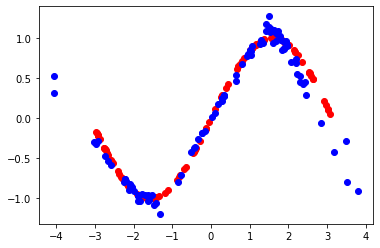

>4001, d1=0.692, d2=0.677 g=0.709, a1=53, a2=62
>4002, d1=0.719, d2=0.675 g=0.720, a1=18, a2=67
>4003, d1=0.707, d2=0.669 g=0.724, a1=42, a2=79
>4004, d1=0.717, d2=0.673 g=0.718, a1=20, a2=68
>4005, d1=0.717, d2=0.668 g=0.717, a1=18, a2=81
>4006, d1=0.718, d2=0.672 g=0.723, a1=26, a2=70
>4007, d1=0.717, d2=0.668 g=0.725, a1=21, a2=79
>4008, d1=0.722, d2=0.662 g=0.727, a1=15, a2=82
>4009, d1=0.724, d2=0.668 g=0.719, a1=18, a2=79
>4010, d1=0.724, d2=0.663 g=0.730, a1=17, a2=82
>4011, d1=0.727, d2=0.663 g=0.730, a1=14, a2=78
>4012, d1=0.726, d2=0.655 g=0.730, a1=12, a2=87
>4013, d1=0.729, d2=0.659 g=0.727, a1=7, a2=93
>4014, d1=0.723, d2=0.661 g=0.732, a1=6, a2=93
>4015, d1=0.725, d2=0.660 g=0.734, a1=1, a2=98
>4016, d1=0.726, d2=0.663 g=0.724, a1=1, a2=100
>4017, d1=0.725, d2=0.665 g=0.726, a1=3, a2=98
>4018, d1=0.726, d2=0.664 g=0.725, a1=4, a2=98
>4019, d1=0.723, d2=0.661 g=0.722, a1=9, a2=98
>4020, d1=0.717, d2=0.665 g=0.723, a1=10, a2=95
>4021, d1=0.727, d2=0.662 g=0.722, a1=4, a2=95

>4173, d1=0.717, d2=0.668 g=0.720, a1=15, a2=84
>4174, d1=0.714, d2=0.670 g=0.724, a1=18, a2=75
>4175, d1=0.718, d2=0.671 g=0.724, a1=9, a2=81
>4176, d1=0.719, d2=0.664 g=0.725, a1=7, a2=87
>4177, d1=0.717, d2=0.671 g=0.726, a1=12, a2=89
>4178, d1=0.722, d2=0.670 g=0.722, a1=1, a2=92
>4179, d1=0.715, d2=0.667 g=0.723, a1=9, a2=92
>4180, d1=0.714, d2=0.667 g=0.724, a1=9, a2=95
>4181, d1=0.720, d2=0.662 g=0.714, a1=9, a2=92
>4182, d1=0.711, d2=0.667 g=0.721, a1=20, a2=89
>4183, d1=0.717, d2=0.670 g=0.721, a1=17, a2=85
>4184, d1=0.711, d2=0.666 g=0.720, a1=26, a2=81
>4185, d1=0.711, d2=0.668 g=0.723, a1=25, a2=81
>4186, d1=0.709, d2=0.674 g=0.723, a1=26, a2=73
>4187, d1=0.715, d2=0.676 g=0.718, a1=21, a2=75
>4188, d1=0.715, d2=0.675 g=0.717, a1=14, a2=76
>4189, d1=0.703, d2=0.679 g=0.712, a1=31, a2=70
>4190, d1=0.710, d2=0.671 g=0.711, a1=17, a2=85
>4191, d1=0.714, d2=0.673 g=0.716, a1=21, a2=79
>4192, d1=0.711, d2=0.674 g=0.712, a1=20, a2=68
>4193, d1=0.707, d2=0.681 g=0.710, a1=21, a2=6

>4344, d1=0.707, d2=0.683 g=0.711, a1=39, a2=59
>4345, d1=0.705, d2=0.666 g=0.717, a1=42, a2=76
>4346, d1=0.704, d2=0.674 g=0.715, a1=39, a2=68
>4347, d1=0.706, d2=0.675 g=0.718, a1=45, a2=67
>4348, d1=0.710, d2=0.672 g=0.724, a1=39, a2=78
>4349, d1=0.714, d2=0.670 g=0.718, a1=28, a2=67
>4350, d1=0.712, d2=0.668 g=0.719, a1=37, a2=81
>4351, d1=0.714, d2=0.672 g=0.724, a1=26, a2=73
>4352, d1=0.712, d2=0.668 g=0.724, a1=31, a2=81
>4353, d1=0.717, d2=0.671 g=0.722, a1=29, a2=76
>4354, d1=0.718, d2=0.668 g=0.719, a1=18, a2=84
>4355, d1=0.716, d2=0.665 g=0.723, a1=28, a2=79
>4356, d1=0.716, d2=0.665 g=0.724, a1=29, a2=78
>4357, d1=0.720, d2=0.667 g=0.723, a1=18, a2=84
>4358, d1=0.714, d2=0.657 g=0.717, a1=35, a2=84
>4359, d1=0.717, d2=0.665 g=0.737, a1=29, a2=81
>4360, d1=0.721, d2=0.666 g=0.725, a1=21, a2=84
>4361, d1=0.720, d2=0.667 g=0.722, a1=26, a2=81
>4362, d1=0.719, d2=0.665 g=0.721, a1=28, a2=85
>4363, d1=0.709, d2=0.671 g=0.721, a1=39, a2=81
>4364, d1=0.713, d2=0.671 g=0.712, a1=29

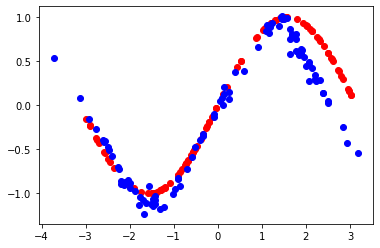

>4501, d1=0.688, d2=0.681 g=0.702, a1=56, a2=56
>4502, d1=0.698, d2=0.682 g=0.697, a1=53, a2=54
>4503, d1=0.693, d2=0.683 g=0.707, a1=54, a2=59
>4504, d1=0.686, d2=0.688 g=0.706, a1=64, a2=51
>4505, d1=0.692, d2=0.694 g=0.698, a1=57, a2=43
>4506, d1=0.682, d2=0.693 g=0.694, a1=67, a2=56
>4507, d1=0.687, d2=0.697 g=0.693, a1=60, a2=46
>4508, d1=0.678, d2=0.696 g=0.709, a1=65, a2=42
>4509, d1=0.682, d2=0.701 g=0.691, a1=59, a2=51
>4510, d1=0.666, d2=0.696 g=0.692, a1=75, a2=45
>4511, d1=0.681, d2=0.698 g=0.683, a1=65, a2=46
>4512, d1=0.675, d2=0.711 g=0.692, a1=62, a2=34
>4513, d1=0.668, d2=0.701 g=0.687, a1=68, a2=45
>4514, d1=0.672, d2=0.710 g=0.690, a1=73, a2=29
>4515, d1=0.676, d2=0.719 g=0.696, a1=68, a2=29
>4516, d1=0.682, d2=0.701 g=0.687, a1=62, a2=45
>4517, d1=0.675, d2=0.701 g=0.687, a1=68, a2=43
>4518, d1=0.679, d2=0.699 g=0.685, a1=68, a2=39
>4519, d1=0.672, d2=0.705 g=0.680, a1=71, a2=45
>4520, d1=0.677, d2=0.708 g=0.685, a1=62, a2=35
>4521, d1=0.675, d2=0.699 g=0.683, a1=62

>4672, d1=0.686, d2=0.700 g=0.691, a1=60, a2=42
>4673, d1=0.682, d2=0.697 g=0.687, a1=62, a2=43
>4674, d1=0.688, d2=0.689 g=0.690, a1=54, a2=43
>4675, d1=0.679, d2=0.697 g=0.687, a1=73, a2=43
>4676, d1=0.682, d2=0.702 g=0.699, a1=64, a2=32
>4677, d1=0.685, d2=0.692 g=0.692, a1=62, a2=48
>4678, d1=0.687, d2=0.686 g=0.698, a1=62, a2=59
>4679, d1=0.686, d2=0.691 g=0.701, a1=53, a2=46
>4680, d1=0.683, d2=0.696 g=0.694, a1=59, a2=40
>4681, d1=0.682, d2=0.691 g=0.692, a1=65, a2=51
>4682, d1=0.684, d2=0.697 g=0.696, a1=60, a2=40
>4683, d1=0.679, d2=0.693 g=0.690, a1=65, a2=43
>4684, d1=0.676, d2=0.695 g=0.690, a1=67, a2=46
>4685, d1=0.682, d2=0.696 g=0.697, a1=57, a2=39
>4686, d1=0.686, d2=0.700 g=0.691, a1=56, a2=40
>4687, d1=0.673, d2=0.697 g=0.689, a1=68, a2=37
>4688, d1=0.684, d2=0.706 g=0.688, a1=57, a2=26
>4689, d1=0.675, d2=0.704 g=0.681, a1=67, a2=42
>4690, d1=0.676, d2=0.707 g=0.682, a1=71, a2=28
>4691, d1=0.678, d2=0.700 g=0.688, a1=67, a2=45
>4692, d1=0.669, d2=0.707 g=0.682, a1=75

>4843, d1=0.695, d2=0.687 g=0.710, a1=51, a2=56
>4844, d1=0.691, d2=0.693 g=0.702, a1=57, a2=46
>4845, d1=0.695, d2=0.684 g=0.701, a1=57, a2=60
>4846, d1=0.699, d2=0.676 g=0.707, a1=51, a2=70
>4847, d1=0.689, d2=0.685 g=0.705, a1=59, a2=54
>4848, d1=0.694, d2=0.689 g=0.699, a1=56, a2=51
>4849, d1=0.689, d2=0.688 g=0.707, a1=59, a2=56
>4850, d1=0.694, d2=0.690 g=0.689, a1=56, a2=48
>4851, d1=0.686, d2=0.689 g=0.699, a1=62, a2=54
>4852, d1=0.678, d2=0.694 g=0.698, a1=68, a2=46
>4853, d1=0.685, d2=0.691 g=0.699, a1=65, a2=50
>4854, d1=0.687, d2=0.696 g=0.704, a1=57, a2=50
>4855, d1=0.687, d2=0.708 g=0.695, a1=54, a2=39
>4856, d1=0.686, d2=0.694 g=0.688, a1=56, a2=39
>4857, d1=0.690, d2=0.692 g=0.687, a1=51, a2=45
>4858, d1=0.676, d2=0.698 g=0.686, a1=64, a2=43
>4859, d1=0.672, d2=0.696 g=0.691, a1=76, a2=53
>4860, d1=0.682, d2=0.695 g=0.687, a1=62, a2=45
>4861, d1=0.680, d2=0.705 g=0.683, a1=57, a2=42
>4862, d1=0.677, d2=0.707 g=0.682, a1=62, a2=40
>4863, d1=0.683, d2=0.701 g=0.683, a1=67

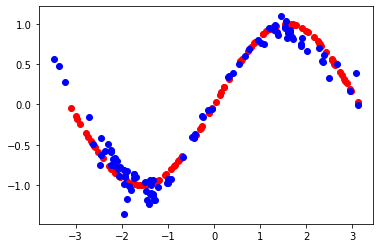

>5001, d1=0.682, d2=0.694 g=0.695, a1=62, a2=42
>5002, d1=0.684, d2=0.703 g=0.700, a1=62, a2=48
>5003, d1=0.691, d2=0.684 g=0.709, a1=56, a2=54
>5004, d1=0.687, d2=0.694 g=0.694, a1=59, a2=43
>5005, d1=0.688, d2=0.684 g=0.693, a1=53, a2=59
>5006, d1=0.689, d2=0.695 g=0.700, a1=60, a2=50
>5007, d1=0.688, d2=0.692 g=0.703, a1=53, a2=48
>5008, d1=0.685, d2=0.693 g=0.705, a1=67, a2=45
>5009, d1=0.679, d2=0.687 g=0.710, a1=65, a2=51
>5010, d1=0.680, d2=0.684 g=0.695, a1=64, a2=56
>5011, d1=0.689, d2=0.690 g=0.683, a1=54, a2=48
>5012, d1=0.677, d2=0.683 g=0.695, a1=67, a2=65
>5013, d1=0.689, d2=0.704 g=0.699, a1=60, a2=39
>5014, d1=0.687, d2=0.690 g=0.701, a1=59, a2=54
>5015, d1=0.683, d2=0.687 g=0.705, a1=62, a2=56
>5016, d1=0.682, d2=0.687 g=0.695, a1=60, a2=56
>5017, d1=0.686, d2=0.684 g=0.705, a1=60, a2=54
>5018, d1=0.700, d2=0.690 g=0.698, a1=46, a2=56
>5019, d1=0.693, d2=0.695 g=0.702, a1=56, a2=46
>5020, d1=0.698, d2=0.688 g=0.695, a1=37, a2=54
>5021, d1=0.680, d2=0.689 g=0.698, a1=71

>5172, d1=0.668, d2=0.699 g=0.680, a1=68, a2=42
>5173, d1=0.677, d2=0.696 g=0.677, a1=64, a2=53
>5174, d1=0.659, d2=0.700 g=0.688, a1=79, a2=46
>5175, d1=0.678, d2=0.706 g=0.678, a1=53, a2=39
>5176, d1=0.671, d2=0.696 g=0.683, a1=70, a2=42
>5177, d1=0.673, d2=0.698 g=0.688, a1=68, a2=39
>5178, d1=0.675, d2=0.712 g=0.693, a1=71, a2=35
>5179, d1=0.676, d2=0.710 g=0.687, a1=71, a2=31
>5180, d1=0.674, d2=0.701 g=0.676, a1=73, a2=28
>5181, d1=0.671, d2=0.693 g=0.687, a1=70, a2=51
>5182, d1=0.680, d2=0.713 g=0.695, a1=67, a2=37
>5183, d1=0.678, d2=0.692 g=0.699, a1=71, a2=39
>5184, d1=0.683, d2=0.695 g=0.707, a1=51, a2=53
>5185, d1=0.686, d2=0.690 g=0.702, a1=65, a2=50
>5186, d1=0.696, d2=0.706 g=0.695, a1=54, a2=29
>5187, d1=0.684, d2=0.688 g=0.706, a1=57, a2=51
>5188, d1=0.689, d2=0.685 g=0.702, a1=56, a2=60
>5189, d1=0.694, d2=0.692 g=0.709, a1=48, a2=46
>5190, d1=0.692, d2=0.691 g=0.714, a1=51, a2=51
>5191, d1=0.695, d2=0.677 g=0.713, a1=56, a2=67
>5192, d1=0.702, d2=0.687 g=0.720, a1=43

>5343, d1=0.677, d2=0.684 g=0.696, a1=53, a2=59
>5344, d1=0.692, d2=0.693 g=0.708, a1=50, a2=56
>5345, d1=0.688, d2=0.686 g=0.699, a1=54, a2=56
>5346, d1=0.678, d2=0.694 g=0.713, a1=60, a2=45
>5347, d1=0.684, d2=0.685 g=0.701, a1=51, a2=48
>5348, d1=0.689, d2=0.698 g=0.703, a1=53, a2=46
>5349, d1=0.686, d2=0.700 g=0.698, a1=57, a2=56
>5350, d1=0.688, d2=0.688 g=0.694, a1=45, a2=53
>5351, d1=0.690, d2=0.692 g=0.694, a1=48, a2=60
>5352, d1=0.676, d2=0.695 g=0.695, a1=67, a2=59
>5353, d1=0.687, d2=0.693 g=0.699, a1=51, a2=51
>5354, d1=0.676, d2=0.703 g=0.693, a1=59, a2=46
>5355, d1=0.677, d2=0.696 g=0.701, a1=56, a2=51
>5356, d1=0.685, d2=0.700 g=0.698, a1=56, a2=35
>5357, d1=0.695, d2=0.692 g=0.702, a1=48, a2=54
>5358, d1=0.690, d2=0.691 g=0.704, a1=48, a2=50
>5359, d1=0.682, d2=0.683 g=0.702, a1=67, a2=57
>5360, d1=0.687, d2=0.690 g=0.698, a1=54, a2=57
>5361, d1=0.687, d2=0.684 g=0.689, a1=57, a2=54
>5362, d1=0.676, d2=0.677 g=0.695, a1=65, a2=59
>5363, d1=0.677, d2=0.699 g=0.699, a1=60

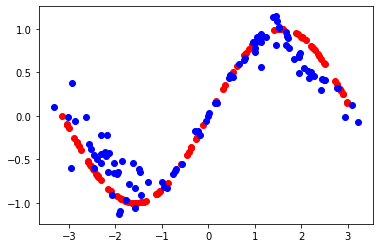

>5501, d1=0.693, d2=0.676 g=0.707, a1=49, a2=60
>5502, d1=0.698, d2=0.692 g=0.703, a1=42, a2=48
>5503, d1=0.684, d2=0.682 g=0.702, a1=60, a2=50
>5504, d1=0.686, d2=0.688 g=0.714, a1=46, a2=51
>5505, d1=0.691, d2=0.670 g=0.708, a1=54, a2=65
>5506, d1=0.683, d2=0.685 g=0.701, a1=60, a2=59
>5507, d1=0.699, d2=0.681 g=0.707, a1=46, a2=57
>5508, d1=0.694, d2=0.685 g=0.696, a1=48, a2=65
>5509, d1=0.691, d2=0.680 g=0.698, a1=53, a2=59
>5510, d1=0.686, d2=0.695 g=0.708, a1=57, a2=48
>5511, d1=0.694, d2=0.682 g=0.703, a1=45, a2=60
>5512, d1=0.679, d2=0.689 g=0.693, a1=60, a2=45
>5513, d1=0.688, d2=0.686 g=0.704, a1=54, a2=56
>5514, d1=0.676, d2=0.690 g=0.703, a1=60, a2=48
>5515, d1=0.686, d2=0.697 g=0.691, a1=50, a2=37
>5516, d1=0.683, d2=0.691 g=0.688, a1=70, a2=53
>5517, d1=0.674, d2=0.694 g=0.691, a1=64, a2=46
>5518, d1=0.673, d2=0.688 g=0.686, a1=65, a2=50
>5519, d1=0.679, d2=0.680 g=0.687, a1=64, a2=54
>5520, d1=0.677, d2=0.703 g=0.689, a1=68, a2=43
>5521, d1=0.663, d2=0.685 g=0.697, a1=67

>5672, d1=0.684, d2=0.681 g=0.704, a1=54, a2=59
>5673, d1=0.691, d2=0.696 g=0.697, a1=46, a2=51
>5674, d1=0.693, d2=0.695 g=0.710, a1=43, a2=48
>5675, d1=0.693, d2=0.695 g=0.702, a1=43, a2=53
>5676, d1=0.692, d2=0.675 g=0.703, a1=56, a2=64
>5677, d1=0.693, d2=0.685 g=0.705, a1=57, a2=65
>5678, d1=0.689, d2=0.696 g=0.704, a1=51, a2=59
>5679, d1=0.689, d2=0.684 g=0.702, a1=53, a2=64
>5680, d1=0.683, d2=0.689 g=0.709, a1=56, a2=54
>5681, d1=0.688, d2=0.691 g=0.703, a1=53, a2=59
>5682, d1=0.692, d2=0.691 g=0.705, a1=53, a2=59
>5683, d1=0.698, d2=0.689 g=0.705, a1=42, a2=57
>5684, d1=0.686, d2=0.688 g=0.706, a1=59, a2=51
>5685, d1=0.679, d2=0.677 g=0.703, a1=57, a2=68
>5686, d1=0.690, d2=0.690 g=0.707, a1=53, a2=60
>5687, d1=0.694, d2=0.687 g=0.704, a1=50, a2=48
>5688, d1=0.680, d2=0.693 g=0.706, a1=54, a2=59
>5689, d1=0.691, d2=0.685 g=0.704, a1=56, a2=60
>5690, d1=0.688, d2=0.675 g=0.702, a1=64, a2=64
>5691, d1=0.686, d2=0.690 g=0.714, a1=60, a2=54
>5692, d1=0.683, d2=0.679 g=0.714, a1=62

>5843, d1=0.694, d2=0.683 g=0.720, a1=45, a2=62
>5844, d1=0.699, d2=0.671 g=0.712, a1=46, a2=64
>5845, d1=0.696, d2=0.681 g=0.711, a1=57, a2=64
>5846, d1=0.713, d2=0.679 g=0.705, a1=35, a2=62
>5847, d1=0.690, d2=0.681 g=0.712, a1=57, a2=56
>5848, d1=0.705, d2=0.681 g=0.724, a1=42, a2=60
>5849, d1=0.697, d2=0.677 g=0.716, a1=53, a2=59
>5850, d1=0.694, d2=0.690 g=0.709, a1=46, a2=53
>5851, d1=0.701, d2=0.682 g=0.711, a1=46, a2=67
>5852, d1=0.714, d2=0.669 g=0.713, a1=34, a2=76
>5853, d1=0.695, d2=0.673 g=0.711, a1=50, a2=79
>5854, d1=0.694, d2=0.678 g=0.718, a1=42, a2=62
>5855, d1=0.708, d2=0.672 g=0.711, a1=37, a2=62
>5856, d1=0.703, d2=0.681 g=0.727, a1=34, a2=57
>5857, d1=0.706, d2=0.676 g=0.715, a1=37, a2=68
>5858, d1=0.697, d2=0.681 g=0.720, a1=50, a2=64
>5859, d1=0.701, d2=0.667 g=0.717, a1=35, a2=73
>5860, d1=0.708, d2=0.677 g=0.721, a1=35, a2=62
>5861, d1=0.686, d2=0.665 g=0.714, a1=48, a2=78
>5862, d1=0.703, d2=0.690 g=0.715, a1=39, a2=54
>5863, d1=0.702, d2=0.665 g=0.708, a1=39

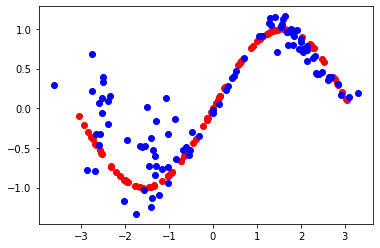

>6001, d1=0.690, d2=0.672 g=0.718, a1=51, a2=65
>6002, d1=0.690, d2=0.682 g=0.722, a1=46, a2=60
>6003, d1=0.691, d2=0.684 g=0.710, a1=54, a2=64
>6004, d1=0.688, d2=0.681 g=0.716, a1=54, a2=64
>6005, d1=0.702, d2=0.675 g=0.718, a1=45, a2=71
>6006, d1=0.698, d2=0.677 g=0.712, a1=40, a2=67
>6007, d1=0.699, d2=0.684 g=0.707, a1=46, a2=67
>6008, d1=0.694, d2=0.684 g=0.706, a1=54, a2=57
>6009, d1=0.700, d2=0.665 g=0.707, a1=50, a2=76
>6010, d1=0.700, d2=0.686 g=0.706, a1=46, a2=62
>6011, d1=0.693, d2=0.681 g=0.699, a1=46, a2=64
>6012, d1=0.688, d2=0.682 g=0.702, a1=56, a2=67
>6013, d1=0.698, d2=0.684 g=0.696, a1=40, a2=68
>6014, d1=0.696, d2=0.687 g=0.697, a1=45, a2=64
>6015, d1=0.689, d2=0.692 g=0.705, a1=53, a2=56
>6016, d1=0.677, d2=0.685 g=0.694, a1=60, a2=68
>6017, d1=0.693, d2=0.682 g=0.691, a1=48, a2=62
>6018, d1=0.687, d2=0.687 g=0.714, a1=46, a2=57
>6019, d1=0.682, d2=0.668 g=0.699, a1=53, a2=73
>6020, d1=0.689, d2=0.684 g=0.702, a1=45, a2=60
>6021, d1=0.685, d2=0.697 g=0.706, a1=50

>6172, d1=0.700, d2=0.685 g=0.706, a1=35, a2=54
>6173, d1=0.692, d2=0.677 g=0.702, a1=40, a2=70
>6174, d1=0.682, d2=0.697 g=0.709, a1=56, a2=53
>6175, d1=0.689, d2=0.692 g=0.711, a1=48, a2=48
>6176, d1=0.690, d2=0.684 g=0.710, a1=43, a2=59
>6177, d1=0.688, d2=0.676 g=0.717, a1=51, a2=68
>6178, d1=0.691, d2=0.689 g=0.716, a1=39, a2=54
>6179, d1=0.686, d2=0.687 g=0.707, a1=53, a2=53
>6180, d1=0.689, d2=0.685 g=0.711, a1=46, a2=56
>6181, d1=0.694, d2=0.684 g=0.711, a1=48, a2=54
>6182, d1=0.689, d2=0.669 g=0.711, a1=45, a2=60
>6183, d1=0.696, d2=0.681 g=0.713, a1=42, a2=57
>6184, d1=0.693, d2=0.683 g=0.717, a1=51, a2=62
>6185, d1=0.698, d2=0.677 g=0.714, a1=42, a2=60
>6186, d1=0.706, d2=0.675 g=0.711, a1=34, a2=59
>6187, d1=0.704, d2=0.675 g=0.718, a1=35, a2=59
>6188, d1=0.702, d2=0.683 g=0.722, a1=39, a2=60
>6189, d1=0.705, d2=0.677 g=0.716, a1=42, a2=59
>6190, d1=0.700, d2=0.677 g=0.713, a1=48, a2=56
>6191, d1=0.698, d2=0.674 g=0.712, a1=46, a2=62
>6192, d1=0.693, d2=0.677 g=0.711, a1=48

>6343, d1=0.681, d2=0.702 g=0.689, a1=67, a2=43
>6344, d1=0.679, d2=0.680 g=0.688, a1=68, a2=60
>6345, d1=0.683, d2=0.684 g=0.696, a1=60, a2=54
>6346, d1=0.690, d2=0.678 g=0.698, a1=51, a2=54
>6347, d1=0.694, d2=0.695 g=0.688, a1=50, a2=42
>6348, d1=0.682, d2=0.693 g=0.701, a1=64, a2=53
>6349, d1=0.694, d2=0.705 g=0.695, a1=50, a2=37
>6350, d1=0.682, d2=0.681 g=0.698, a1=67, a2=60
>6351, d1=0.678, d2=0.697 g=0.691, a1=62, a2=37
>6352, d1=0.685, d2=0.693 g=0.694, a1=57, a2=45
>6353, d1=0.673, d2=0.689 g=0.701, a1=65, a2=40
>6354, d1=0.675, d2=0.702 g=0.683, a1=68, a2=46
>6355, d1=0.673, d2=0.703 g=0.690, a1=68, a2=42
>6356, d1=0.676, d2=0.710 g=0.687, a1=65, a2=35
>6357, d1=0.677, d2=0.691 g=0.688, a1=60, a2=56
>6358, d1=0.678, d2=0.698 g=0.684, a1=57, a2=46
>6359, d1=0.673, d2=0.698 g=0.693, a1=67, a2=54
>6360, d1=0.673, d2=0.710 g=0.688, a1=70, a2=35
>6361, d1=0.681, d2=0.698 g=0.688, a1=57, a2=50
>6362, d1=0.682, d2=0.700 g=0.698, a1=59, a2=42
>6363, d1=0.689, d2=0.686 g=0.691, a1=54

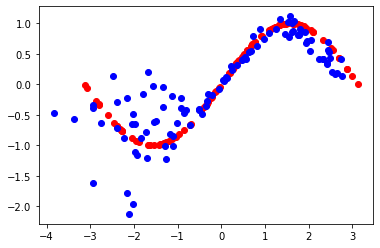

>6501, d1=0.686, d2=0.689 g=0.698, a1=59, a2=57
>6502, d1=0.685, d2=0.691 g=0.699, a1=62, a2=46
>6503, d1=0.700, d2=0.697 g=0.694, a1=59, a2=54
>6504, d1=0.683, d2=0.684 g=0.694, a1=65, a2=59
>6505, d1=0.691, d2=0.691 g=0.696, a1=59, a2=50
>6506, d1=0.689, d2=0.686 g=0.694, a1=54, a2=56
>6507, d1=0.681, d2=0.690 g=0.698, a1=60, a2=53
>6508, d1=0.684, d2=0.689 g=0.699, a1=65, a2=48
>6509, d1=0.684, d2=0.691 g=0.692, a1=64, a2=50
>6510, d1=0.674, d2=0.688 g=0.700, a1=76, a2=50
>6511, d1=0.676, d2=0.699 g=0.700, a1=67, a2=40
>6512, d1=0.693, d2=0.690 g=0.696, a1=60, a2=53
>6513, d1=0.705, d2=0.683 g=0.698, a1=45, a2=46
>6514, d1=0.679, d2=0.687 g=0.691, a1=67, a2=54
>6515, d1=0.691, d2=0.695 g=0.700, a1=54, a2=53
>6516, d1=0.685, d2=0.680 g=0.701, a1=53, a2=65
>6517, d1=0.691, d2=0.691 g=0.702, a1=54, a2=56
>6518, d1=0.696, d2=0.688 g=0.699, a1=43, a2=62
>6519, d1=0.675, d2=0.695 g=0.700, a1=65, a2=48
>6520, d1=0.698, d2=0.695 g=0.711, a1=48, a2=39
>6521, d1=0.691, d2=0.692 g=0.697, a1=51

>6672, d1=0.686, d2=0.687 g=0.694, a1=62, a2=57
>6673, d1=0.686, d2=0.698 g=0.697, a1=56, a2=48
>6674, d1=0.683, d2=0.698 g=0.690, a1=57, a2=48
>6675, d1=0.684, d2=0.696 g=0.698, a1=53, a2=46
>6676, d1=0.679, d2=0.696 g=0.697, a1=62, a2=50
>6677, d1=0.683, d2=0.690 g=0.693, a1=56, a2=56
>6678, d1=0.692, d2=0.697 g=0.693, a1=48, a2=45
>6679, d1=0.690, d2=0.690 g=0.701, a1=53, a2=50
>6680, d1=0.693, d2=0.689 g=0.696, a1=48, a2=46
>6681, d1=0.688, d2=0.681 g=0.697, a1=54, a2=60
>6682, d1=0.680, d2=0.693 g=0.695, a1=65, a2=53
>6683, d1=0.687, d2=0.689 g=0.692, a1=57, a2=54
>6684, d1=0.684, d2=0.685 g=0.690, a1=62, a2=57
>6685, d1=0.676, d2=0.695 g=0.699, a1=73, a2=54
>6686, d1=0.688, d2=0.692 g=0.697, a1=56, a2=50
>6687, d1=0.680, d2=0.692 g=0.697, a1=64, a2=48
>6688, d1=0.685, d2=0.683 g=0.699, a1=51, a2=56
>6689, d1=0.688, d2=0.683 g=0.704, a1=54, a2=67
>6690, d1=0.691, d2=0.684 g=0.697, a1=51, a2=51
>6691, d1=0.689, d2=0.691 g=0.702, a1=59, a2=48
>6692, d1=0.678, d2=0.706 g=0.703, a1=65

>6843, d1=0.682, d2=0.693 g=0.700, a1=57, a2=50
>6844, d1=0.681, d2=0.701 g=0.692, a1=54, a2=39
>6845, d1=0.683, d2=0.698 g=0.685, a1=53, a2=46
>6846, d1=0.672, d2=0.697 g=0.692, a1=65, a2=48
>6847, d1=0.679, d2=0.693 g=0.695, a1=70, a2=54
>6848, d1=0.677, d2=0.694 g=0.703, a1=62, a2=51
>6849, d1=0.679, d2=0.700 g=0.699, a1=56, a2=48
>6850, d1=0.675, d2=0.688 g=0.697, a1=62, a2=60
>6851, d1=0.688, d2=0.695 g=0.696, a1=51, a2=50
>6852, d1=0.680, d2=0.696 g=0.693, a1=53, a2=51
>6853, d1=0.691, d2=0.687 g=0.703, a1=50, a2=56
>6854, d1=0.686, d2=0.691 g=0.698, a1=51, a2=53
>6855, d1=0.685, d2=0.698 g=0.695, a1=57, a2=43
>6856, d1=0.687, d2=0.691 g=0.705, a1=45, a2=59
>6857, d1=0.691, d2=0.683 g=0.702, a1=42, a2=68
>6858, d1=0.685, d2=0.692 g=0.701, a1=45, a2=56
>6859, d1=0.685, d2=0.694 g=0.701, a1=57, a2=62
>6860, d1=0.683, d2=0.687 g=0.709, a1=62, a2=60
>6861, d1=0.688, d2=0.680 g=0.704, a1=50, a2=65
>6862, d1=0.697, d2=0.685 g=0.707, a1=42, a2=60
>6863, d1=0.686, d2=0.695 g=0.699, a1=56

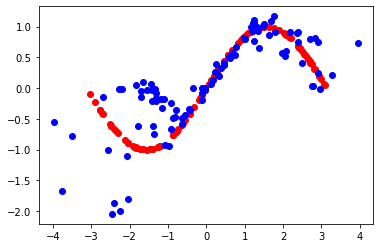

>7001, d1=0.684, d2=0.686 g=0.708, a1=59, a2=57
>7002, d1=0.693, d2=0.682 g=0.701, a1=51, a2=68
>7003, d1=0.685, d2=0.684 g=0.699, a1=56, a2=60
>7004, d1=0.691, d2=0.688 g=0.707, a1=45, a2=56
>7005, d1=0.692, d2=0.688 g=0.698, a1=46, a2=54
>7006, d1=0.694, d2=0.685 g=0.708, a1=50, a2=53
>7007, d1=0.690, d2=0.687 g=0.708, a1=54, a2=53
>7008, d1=0.692, d2=0.688 g=0.702, a1=46, a2=56
>7009, d1=0.689, d2=0.680 g=0.697, a1=54, a2=60
>7010, d1=0.697, d2=0.689 g=0.701, a1=40, a2=56
>7011, d1=0.690, d2=0.690 g=0.699, a1=54, a2=56
>7012, d1=0.689, d2=0.689 g=0.704, a1=53, a2=46
>7013, d1=0.688, d2=0.686 g=0.709, a1=54, a2=48
>7014, d1=0.690, d2=0.680 g=0.706, a1=57, a2=57
>7015, d1=0.697, d2=0.683 g=0.706, a1=42, a2=50
>7016, d1=0.700, d2=0.687 g=0.708, a1=45, a2=43
>7017, d1=0.707, d2=0.688 g=0.707, a1=39, a2=54
>7018, d1=0.702, d2=0.687 g=0.703, a1=43, a2=54
>7019, d1=0.698, d2=0.690 g=0.702, a1=39, a2=54
>7020, d1=0.683, d2=0.691 g=0.694, a1=50, a2=54
>7021, d1=0.688, d2=0.691 g=0.692, a1=48

>7172, d1=0.678, d2=0.697 g=0.688, a1=65, a2=39
>7173, d1=0.674, d2=0.695 g=0.690, a1=67, a2=53
>7174, d1=0.659, d2=0.703 g=0.686, a1=78, a2=42
>7175, d1=0.672, d2=0.713 g=0.683, a1=75, a2=31
>7176, d1=0.665, d2=0.710 g=0.684, a1=70, a2=37
>7177, d1=0.661, d2=0.710 g=0.676, a1=82, a2=35
>7178, d1=0.654, d2=0.704 g=0.685, a1=84, a2=35
>7179, d1=0.660, d2=0.712 g=0.684, a1=81, a2=39
>7180, d1=0.662, d2=0.714 g=0.680, a1=75, a2=32
>7181, d1=0.663, d2=0.704 g=0.676, a1=67, a2=43
>7182, d1=0.660, d2=0.720 g=0.671, a1=68, a2=26
>7183, d1=0.667, d2=0.713 g=0.663, a1=68, a2=34
>7184, d1=0.664, d2=0.714 g=0.674, a1=75, a2=37
>7185, d1=0.664, d2=0.721 g=0.667, a1=67, a2=28
>7186, d1=0.653, d2=0.717 g=0.665, a1=85, a2=32
>7187, d1=0.653, d2=0.729 g=0.676, a1=93, a2=18
>7188, d1=0.651, d2=0.722 g=0.673, a1=95, a2=25
>7189, d1=0.650, d2=0.723 g=0.675, a1=98, a2=12
>7190, d1=0.656, d2=0.728 g=0.667, a1=96, a2=10
>7191, d1=0.653, d2=0.717 g=0.672, a1=98, a2=18
>7192, d1=0.657, d2=0.707 g=0.665, a1=93

>7343, d1=0.679, d2=0.701 g=0.691, a1=71, a2=37
>7344, d1=0.682, d2=0.691 g=0.692, a1=64, a2=39
>7345, d1=0.680, d2=0.683 g=0.702, a1=62, a2=53
>7346, d1=0.683, d2=0.686 g=0.697, a1=65, a2=43
>7347, d1=0.685, d2=0.697 g=0.701, a1=62, a2=35
>7348, d1=0.675, d2=0.690 g=0.694, a1=73, a2=45
>7349, d1=0.687, d2=0.692 g=0.699, a1=64, a2=48
>7350, d1=0.674, d2=0.683 g=0.697, a1=76, a2=51
>7351, d1=0.681, d2=0.692 g=0.700, a1=70, a2=40
>7352, d1=0.678, d2=0.703 g=0.691, a1=71, a2=29
>7353, d1=0.677, d2=0.697 g=0.692, a1=67, a2=34
>7354, d1=0.669, d2=0.694 g=0.691, a1=84, a2=39
>7355, d1=0.677, d2=0.693 g=0.690, a1=70, a2=42
>7356, d1=0.683, d2=0.700 g=0.688, a1=64, a2=34
>7357, d1=0.674, d2=0.701 g=0.690, a1=76, a2=35
>7358, d1=0.678, d2=0.698 g=0.687, a1=70, a2=40
>7359, d1=0.675, d2=0.697 g=0.693, a1=73, a2=35
>7360, d1=0.673, d2=0.690 g=0.696, a1=76, a2=48
>7361, d1=0.681, d2=0.693 g=0.692, a1=68, a2=43
>7362, d1=0.675, d2=0.697 g=0.689, a1=65, a2=37
>7363, d1=0.680, d2=0.694 g=0.695, a1=67

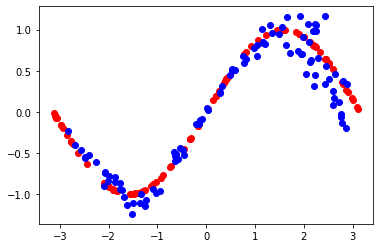

>7501, d1=0.686, d2=0.687 g=0.698, a1=59, a2=46
>7502, d1=0.694, d2=0.681 g=0.705, a1=51, a2=64
>7503, d1=0.693, d2=0.693 g=0.702, a1=48, a2=60
>7504, d1=0.694, d2=0.684 g=0.701, a1=45, a2=71
>7505, d1=0.680, d2=0.682 g=0.700, a1=59, a2=70
>7506, d1=0.699, d2=0.687 g=0.706, a1=40, a2=62
>7507, d1=0.687, d2=0.691 g=0.703, a1=51, a2=56
>7508, d1=0.693, d2=0.683 g=0.699, a1=40, a2=62
>7509, d1=0.688, d2=0.688 g=0.699, a1=50, a2=56
>7510, d1=0.682, d2=0.682 g=0.710, a1=54, a2=59
>7511, d1=0.685, d2=0.696 g=0.705, a1=45, a2=45
>7512, d1=0.694, d2=0.683 g=0.704, a1=42, a2=53
>7513, d1=0.704, d2=0.687 g=0.709, a1=32, a2=60
>7514, d1=0.692, d2=0.685 g=0.704, a1=45, a2=64
>7515, d1=0.695, d2=0.688 g=0.702, a1=43, a2=59
>7516, d1=0.694, d2=0.682 g=0.700, a1=37, a2=68
>7517, d1=0.694, d2=0.692 g=0.706, a1=37, a2=48
>7518, d1=0.685, d2=0.675 g=0.713, a1=59, a2=67
>7519, d1=0.691, d2=0.682 g=0.703, a1=46, a2=67
>7520, d1=0.699, d2=0.681 g=0.711, a1=40, a2=71
>7521, d1=0.703, d2=0.675 g=0.711, a1=31

>7672, d1=0.682, d2=0.681 g=0.703, a1=48, a2=71
>7673, d1=0.692, d2=0.683 g=0.703, a1=43, a2=64
>7674, d1=0.692, d2=0.692 g=0.701, a1=42, a2=60
>7675, d1=0.692, d2=0.688 g=0.704, a1=39, a2=67
>7676, d1=0.703, d2=0.690 g=0.695, a1=25, a2=62
>7677, d1=0.691, d2=0.697 g=0.698, a1=32, a2=54
>7678, d1=0.688, d2=0.693 g=0.698, a1=40, a2=56
>7679, d1=0.672, d2=0.686 g=0.701, a1=51, a2=70
>7680, d1=0.684, d2=0.679 g=0.701, a1=48, a2=73
>7681, d1=0.687, d2=0.680 g=0.700, a1=42, a2=70
>7682, d1=0.678, d2=0.694 g=0.702, a1=46, a2=62
>7683, d1=0.689, d2=0.688 g=0.698, a1=40, a2=67
>7684, d1=0.692, d2=0.687 g=0.701, a1=39, a2=59
>7685, d1=0.690, d2=0.696 g=0.700, a1=42, a2=53
>7686, d1=0.693, d2=0.687 g=0.701, a1=32, a2=68
>7687, d1=0.688, d2=0.693 g=0.705, a1=40, a2=54
>7688, d1=0.685, d2=0.692 g=0.701, a1=43, a2=57
>7689, d1=0.695, d2=0.690 g=0.698, a1=40, a2=65
>7690, d1=0.694, d2=0.693 g=0.694, a1=35, a2=57
>7691, d1=0.689, d2=0.691 g=0.697, a1=39, a2=60
>7692, d1=0.696, d2=0.679 g=0.700, a1=42

>7843, d1=0.694, d2=0.685 g=0.700, a1=42, a2=60
>7844, d1=0.680, d2=0.696 g=0.697, a1=54, a2=57
>7845, d1=0.691, d2=0.695 g=0.693, a1=39, a2=53
>7846, d1=0.688, d2=0.690 g=0.697, a1=45, a2=64
>7847, d1=0.685, d2=0.698 g=0.698, a1=40, a2=54
>7848, d1=0.684, d2=0.689 g=0.702, a1=50, a2=64
>7849, d1=0.682, d2=0.688 g=0.695, a1=48, a2=62
>7850, d1=0.686, d2=0.681 g=0.708, a1=39, a2=65
>7851, d1=0.685, d2=0.691 g=0.701, a1=43, a2=65
>7852, d1=0.694, d2=0.685 g=0.701, a1=32, a2=68
>7853, d1=0.695, d2=0.689 g=0.709, a1=37, a2=64
>7854, d1=0.691, d2=0.690 g=0.704, a1=40, a2=62
>7855, d1=0.687, d2=0.693 g=0.702, a1=43, a2=62
>7856, d1=0.703, d2=0.702 g=0.695, a1=28, a2=53
>7857, d1=0.681, d2=0.687 g=0.700, a1=48, a2=60
>7858, d1=0.691, d2=0.691 g=0.700, a1=39, a2=60
>7859, d1=0.685, d2=0.694 g=0.703, a1=42, a2=60
>7860, d1=0.686, d2=0.688 g=0.695, a1=43, a2=65
>7861, d1=0.681, d2=0.682 g=0.693, a1=45, a2=75
>7862, d1=0.687, d2=0.693 g=0.697, a1=50, a2=57
>7863, d1=0.685, d2=0.693 g=0.702, a1=50

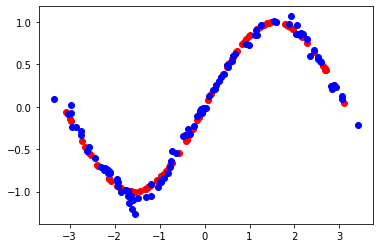

>8001, d1=0.693, d2=0.708 g=0.678, a1=48, a2=37
>8002, d1=0.671, d2=0.704 g=0.688, a1=68, a2=40
>8003, d1=0.671, d2=0.703 g=0.681, a1=62, a2=37
>8004, d1=0.674, d2=0.711 g=0.678, a1=67, a2=42
>8005, d1=0.669, d2=0.705 g=0.682, a1=67, a2=48
>8006, d1=0.677, d2=0.709 g=0.680, a1=64, a2=43
>8007, d1=0.679, d2=0.699 g=0.682, a1=62, a2=46
>8008, d1=0.686, d2=0.704 g=0.683, a1=62, a2=46
>8009, d1=0.676, d2=0.702 g=0.684, a1=65, a2=48
>8010, d1=0.675, d2=0.701 g=0.685, a1=62, a2=46
>8011, d1=0.677, d2=0.698 g=0.695, a1=67, a2=48
>8012, d1=0.686, d2=0.699 g=0.694, a1=65, a2=43
>8013, d1=0.684, d2=0.687 g=0.691, a1=65, a2=53
>8014, d1=0.678, d2=0.694 g=0.690, a1=68, a2=45
>8015, d1=0.691, d2=0.694 g=0.699, a1=65, a2=45
>8016, d1=0.699, d2=0.685 g=0.696, a1=50, a2=57
>8017, d1=0.699, d2=0.684 g=0.702, a1=50, a2=53
>8018, d1=0.689, d2=0.684 g=0.707, a1=60, a2=48
>8019, d1=0.699, d2=0.694 g=0.697, a1=65, a2=46
>8020, d1=0.697, d2=0.685 g=0.703, a1=56, a2=48
>8021, d1=0.697, d2=0.678 g=0.710, a1=53

>8172, d1=0.678, d2=0.692 g=0.696, a1=62, a2=46
>8173, d1=0.696, d2=0.699 g=0.693, a1=51, a2=42
>8174, d1=0.685, d2=0.697 g=0.696, a1=59, a2=50
>8175, d1=0.687, d2=0.697 g=0.695, a1=56, a2=48
>8176, d1=0.693, d2=0.682 g=0.690, a1=50, a2=59
>8177, d1=0.694, d2=0.691 g=0.691, a1=46, a2=57
>8178, d1=0.690, d2=0.690 g=0.693, a1=40, a2=56
>8179, d1=0.691, d2=0.696 g=0.696, a1=50, a2=57
>8180, d1=0.683, d2=0.687 g=0.696, a1=54, a2=59
>8181, d1=0.690, d2=0.687 g=0.689, a1=45, a2=64
>8182, d1=0.683, d2=0.703 g=0.696, a1=51, a2=53
>8183, d1=0.689, d2=0.687 g=0.691, a1=43, a2=67
>8184, d1=0.685, d2=0.698 g=0.691, a1=48, a2=56
>8185, d1=0.688, d2=0.700 g=0.690, a1=48, a2=51
>8186, d1=0.685, d2=0.696 g=0.699, a1=45, a2=56
>8187, d1=0.682, d2=0.688 g=0.697, a1=46, a2=68
>8188, d1=0.688, d2=0.691 g=0.693, a1=42, a2=73
>8189, d1=0.679, d2=0.691 g=0.694, a1=51, a2=68
>8190, d1=0.686, d2=0.692 g=0.700, a1=46, a2=65
>8191, d1=0.686, d2=0.693 g=0.690, a1=57, a2=64
>8192, d1=0.685, d2=0.687 g=0.691, a1=54

>8343, d1=0.682, d2=0.701 g=0.687, a1=64, a2=45
>8344, d1=0.686, d2=0.691 g=0.690, a1=59, a2=46
>8345, d1=0.680, d2=0.699 g=0.684, a1=64, a2=39
>8346, d1=0.680, d2=0.701 g=0.692, a1=65, a2=39
>8347, d1=0.685, d2=0.706 g=0.688, a1=53, a2=32
>8348, d1=0.679, d2=0.700 g=0.684, a1=62, a2=50
>8349, d1=0.679, d2=0.705 g=0.682, a1=75, a2=35
>8350, d1=0.677, d2=0.705 g=0.690, a1=67, a2=35
>8351, d1=0.676, d2=0.703 g=0.684, a1=68, a2=40
>8352, d1=0.669, d2=0.700 g=0.676, a1=78, a2=35
>8353, d1=0.675, d2=0.700 g=0.682, a1=76, a2=37
>8354, d1=0.675, d2=0.709 g=0.676, a1=75, a2=21
>8355, d1=0.675, d2=0.704 g=0.678, a1=71, a2=39
>8356, d1=0.672, d2=0.711 g=0.673, a1=76, a2=21
>8357, d1=0.674, d2=0.722 g=0.676, a1=75, a2=17
>8358, d1=0.669, d2=0.721 g=0.683, a1=68, a2=31
>8359, d1=0.672, d2=0.708 g=0.679, a1=70, a2=32
>8360, d1=0.674, d2=0.715 g=0.676, a1=73, a2=32
>8361, d1=0.678, d2=0.707 g=0.689, a1=67, a2=35
>8362, d1=0.675, d2=0.701 g=0.683, a1=68, a2=42
>8363, d1=0.672, d2=0.698 g=0.691, a1=71

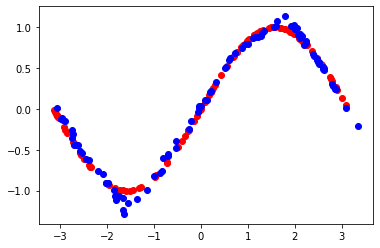

>8501, d1=0.693, d2=0.700 g=0.689, a1=51, a2=37
>8502, d1=0.683, d2=0.704 g=0.687, a1=60, a2=48
>8503, d1=0.688, d2=0.699 g=0.685, a1=64, a2=40
>8504, d1=0.682, d2=0.698 g=0.690, a1=71, a2=42
>8505, d1=0.688, d2=0.702 g=0.689, a1=53, a2=39
>8506, d1=0.683, d2=0.694 g=0.688, a1=65, a2=57
>8507, d1=0.680, d2=0.699 g=0.688, a1=68, a2=51
>8508, d1=0.681, d2=0.694 g=0.688, a1=60, a2=53
>8509, d1=0.677, d2=0.701 g=0.685, a1=59, a2=43
>8510, d1=0.693, d2=0.704 g=0.687, a1=51, a2=40
>8511, d1=0.683, d2=0.709 g=0.688, a1=56, a2=32
>8512, d1=0.687, d2=0.713 g=0.678, a1=51, a2=34
>8513, d1=0.677, d2=0.702 g=0.689, a1=59, a2=50
>8514, d1=0.686, d2=0.704 g=0.685, a1=59, a2=39
>8515, d1=0.683, d2=0.706 g=0.681, a1=60, a2=39
>8516, d1=0.677, d2=0.704 g=0.683, a1=62, a2=40
>8517, d1=0.679, d2=0.703 g=0.682, a1=60, a2=39
>8518, d1=0.672, d2=0.704 g=0.681, a1=79, a2=40
>8519, d1=0.681, d2=0.705 g=0.686, a1=60, a2=35
>8520, d1=0.674, d2=0.700 g=0.687, a1=67, a2=45
>8521, d1=0.684, d2=0.695 g=0.684, a1=60

>8672, d1=0.687, d2=0.694 g=0.693, a1=54, a2=50
>8673, d1=0.679, d2=0.703 g=0.690, a1=54, a2=34
>8674, d1=0.680, d2=0.699 g=0.691, a1=60, a2=45
>8675, d1=0.690, d2=0.698 g=0.685, a1=43, a2=40
>8676, d1=0.684, d2=0.698 g=0.690, a1=64, a2=43
>8677, d1=0.684, d2=0.700 g=0.686, a1=60, a2=43
>8678, d1=0.677, d2=0.694 g=0.692, a1=62, a2=54
>8679, d1=0.688, d2=0.703 g=0.696, a1=45, a2=45
>8680, d1=0.683, d2=0.691 g=0.695, a1=45, a2=64
>8681, d1=0.685, d2=0.693 g=0.688, a1=46, a2=59
>8682, d1=0.686, d2=0.687 g=0.697, a1=42, a2=67
>8683, d1=0.687, d2=0.693 g=0.696, a1=45, a2=56
>8684, d1=0.689, d2=0.697 g=0.687, a1=35, a2=53
>8685, d1=0.686, d2=0.703 g=0.696, a1=50, a2=50
>8686, d1=0.687, d2=0.690 g=0.692, a1=45, a2=64
>8687, d1=0.681, d2=0.696 g=0.692, a1=62, a2=46
>8688, d1=0.682, d2=0.702 g=0.690, a1=68, a2=45
>8689, d1=0.687, d2=0.695 g=0.688, a1=64, a2=50
>8690, d1=0.679, d2=0.703 g=0.686, a1=60, a2=40
>8691, d1=0.678, d2=0.701 g=0.689, a1=62, a2=43
>8692, d1=0.675, d2=0.707 g=0.688, a1=64

>8843, d1=0.685, d2=0.691 g=0.694, a1=39, a2=67
>8844, d1=0.690, d2=0.695 g=0.690, a1=46, a2=46
>8845, d1=0.684, d2=0.695 g=0.693, a1=54, a2=57
>8846, d1=0.685, d2=0.699 g=0.690, a1=54, a2=50
>8847, d1=0.686, d2=0.702 g=0.690, a1=59, a2=46
>8848, d1=0.688, d2=0.693 g=0.693, a1=56, a2=48
>8849, d1=0.683, d2=0.690 g=0.695, a1=67, a2=54
>8850, d1=0.683, d2=0.695 g=0.694, a1=48, a2=40
>8851, d1=0.686, d2=0.710 g=0.687, a1=48, a2=32
>8852, d1=0.673, d2=0.702 g=0.687, a1=65, a2=39
>8853, d1=0.677, d2=0.698 g=0.684, a1=59, a2=48
>8854, d1=0.685, d2=0.701 g=0.680, a1=50, a2=43
>8855, d1=0.679, d2=0.703 g=0.679, a1=54, a2=50
>8856, d1=0.683, d2=0.705 g=0.679, a1=48, a2=46
>8857, d1=0.676, d2=0.726 g=0.678, a1=68, a2=21
>8858, d1=0.678, d2=0.712 g=0.690, a1=64, a2=29
>8859, d1=0.678, d2=0.715 g=0.684, a1=57, a2=23
>8860, d1=0.674, d2=0.702 g=0.681, a1=67, a2=40
>8861, d1=0.672, d2=0.704 g=0.686, a1=71, a2=37
>8862, d1=0.683, d2=0.700 g=0.690, a1=62, a2=45
>8863, d1=0.687, d2=0.704 g=0.692, a1=51

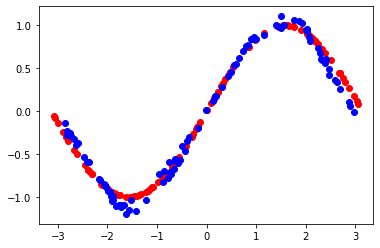

>9001, d1=0.701, d2=0.703 g=0.679, a1=42, a2=29
>9002, d1=0.679, d2=0.709 g=0.682, a1=70, a2=29
>9003, d1=0.672, d2=0.699 g=0.685, a1=75, a2=42
>9004, d1=0.667, d2=0.718 g=0.681, a1=81, a2=20
>9005, d1=0.672, d2=0.704 g=0.681, a1=79, a2=29
>9006, d1=0.676, d2=0.704 g=0.687, a1=73, a2=37
>9007, d1=0.682, d2=0.709 g=0.686, a1=60, a2=32
>9008, d1=0.676, d2=0.700 g=0.687, a1=71, a2=35
>9009, d1=0.684, d2=0.710 g=0.690, a1=53, a2=29
>9010, d1=0.685, d2=0.705 g=0.688, a1=59, a2=35
>9011, d1=0.669, d2=0.701 g=0.679, a1=73, a2=29
>9012, d1=0.670, d2=0.700 g=0.688, a1=70, a2=42
>9013, d1=0.678, d2=0.708 g=0.682, a1=62, a2=31
>9014, d1=0.677, d2=0.707 g=0.680, a1=70, a2=31
>9015, d1=0.674, d2=0.705 g=0.679, a1=76, a2=39
>9016, d1=0.678, d2=0.713 g=0.673, a1=64, a2=25
>9017, d1=0.668, d2=0.719 g=0.679, a1=73, a2=23
>9018, d1=0.672, d2=0.714 g=0.673, a1=75, a2=37
>9019, d1=0.672, d2=0.709 g=0.681, a1=70, a2=34
>9020, d1=0.680, d2=0.716 g=0.685, a1=70, a2=21
>9021, d1=0.676, d2=0.707 g=0.681, a1=68

>9172, d1=0.670, d2=0.698 g=0.691, a1=76, a2=39
>9173, d1=0.676, d2=0.698 g=0.692, a1=79, a2=42
>9174, d1=0.663, d2=0.704 g=0.690, a1=79, a2=37
>9175, d1=0.678, d2=0.705 g=0.686, a1=78, a2=31
>9176, d1=0.672, d2=0.705 g=0.677, a1=75, a2=28
>9177, d1=0.669, d2=0.710 g=0.683, a1=75, a2=29
>9178, d1=0.671, d2=0.715 g=0.678, a1=67, a2=29
>9179, d1=0.664, d2=0.710 g=0.676, a1=78, a2=26
>9180, d1=0.665, d2=0.711 g=0.677, a1=68, a2=25
>9181, d1=0.675, d2=0.705 g=0.674, a1=75, a2=37
>9182, d1=0.674, d2=0.704 g=0.675, a1=68, a2=39
>9183, d1=0.666, d2=0.706 g=0.672, a1=75, a2=39
>9184, d1=0.674, d2=0.731 g=0.673, a1=64, a2=12
>9185, d1=0.670, d2=0.703 g=0.684, a1=71, a2=40
>9186, d1=0.674, d2=0.709 g=0.682, a1=68, a2=35
>9187, d1=0.670, d2=0.715 g=0.681, a1=68, a2=25
>9188, d1=0.675, d2=0.713 g=0.684, a1=70, a2=39
>9189, d1=0.685, d2=0.702 g=0.690, a1=67, a2=45
>9190, d1=0.676, d2=0.699 g=0.691, a1=71, a2=39
>9191, d1=0.685, d2=0.693 g=0.691, a1=68, a2=45
>9192, d1=0.683, d2=0.703 g=0.694, a1=70

>9343, d1=0.678, d2=0.713 g=0.681, a1=71, a2=26
>9344, d1=0.675, d2=0.707 g=0.687, a1=78, a2=28
>9345, d1=0.673, d2=0.705 g=0.685, a1=79, a2=26
>9346, d1=0.675, d2=0.710 g=0.680, a1=79, a2=21
>9347, d1=0.674, d2=0.704 g=0.682, a1=71, a2=31
>9348, d1=0.672, d2=0.708 g=0.687, a1=78, a2=29
>9349, d1=0.682, d2=0.704 g=0.685, a1=68, a2=25
>9350, d1=0.672, d2=0.696 g=0.687, a1=82, a2=37
>9351, d1=0.678, d2=0.702 g=0.683, a1=71, a2=34
>9352, d1=0.683, d2=0.707 g=0.681, a1=70, a2=32
>9353, d1=0.681, d2=0.702 g=0.683, a1=75, a2=34
>9354, d1=0.685, d2=0.703 g=0.686, a1=65, a2=34
>9355, d1=0.675, d2=0.710 g=0.688, a1=71, a2=32
>9356, d1=0.684, d2=0.698 g=0.688, a1=62, a2=40
>9357, d1=0.683, d2=0.696 g=0.696, a1=65, a2=43
>9358, d1=0.685, d2=0.694 g=0.689, a1=56, a2=48
>9359, d1=0.686, d2=0.694 g=0.698, a1=64, a2=51
>9360, d1=0.695, d2=0.689 g=0.694, a1=59, a2=46
>9361, d1=0.689, d2=0.699 g=0.694, a1=62, a2=35
>9362, d1=0.684, d2=0.693 g=0.696, a1=71, a2=48
>9363, d1=0.684, d2=0.693 g=0.694, a1=67

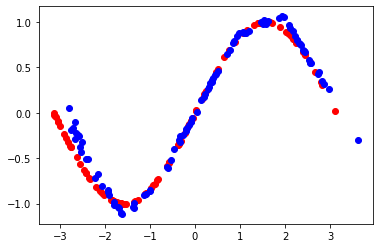

>9501, d1=0.689, d2=0.683 g=0.692, a1=57, a2=71
>9502, d1=0.674, d2=0.689 g=0.694, a1=65, a2=57
>9503, d1=0.693, d2=0.694 g=0.693, a1=48, a2=59
>9504, d1=0.686, d2=0.693 g=0.693, a1=46, a2=51
>9505, d1=0.679, d2=0.695 g=0.693, a1=56, a2=50
>9506, d1=0.684, d2=0.696 g=0.694, a1=56, a2=60
>9507, d1=0.678, d2=0.693 g=0.690, a1=71, a2=53
>9508, d1=0.682, d2=0.698 g=0.690, a1=56, a2=53
>9509, d1=0.682, d2=0.696 g=0.686, a1=68, a2=50
>9510, d1=0.679, d2=0.701 g=0.689, a1=71, a2=42
>9511, d1=0.686, d2=0.700 g=0.687, a1=62, a2=42
>9512, d1=0.671, d2=0.706 g=0.690, a1=73, a2=34
>9513, d1=0.675, d2=0.701 g=0.688, a1=75, a2=42
>9514, d1=0.669, d2=0.696 g=0.684, a1=81, a2=43
>9515, d1=0.673, d2=0.701 g=0.686, a1=71, a2=39
>9516, d1=0.689, d2=0.703 g=0.686, a1=51, a2=37
>9517, d1=0.686, d2=0.698 g=0.689, a1=64, a2=42
>9518, d1=0.683, d2=0.699 g=0.693, a1=59, a2=46
>9519, d1=0.683, d2=0.699 g=0.688, a1=64, a2=42
>9520, d1=0.674, d2=0.702 g=0.691, a1=68, a2=42
>9521, d1=0.678, d2=0.696 g=0.688, a1=67

>9672, d1=0.695, d2=0.698 g=0.694, a1=32, a2=57
>9673, d1=0.684, d2=0.692 g=0.695, a1=46, a2=60
>9674, d1=0.685, d2=0.683 g=0.690, a1=40, a2=70
>9675, d1=0.695, d2=0.688 g=0.695, a1=32, a2=75
>9676, d1=0.685, d2=0.686 g=0.696, a1=37, a2=65
>9677, d1=0.690, d2=0.700 g=0.698, a1=40, a2=57
>9678, d1=0.688, d2=0.692 g=0.690, a1=35, a2=67
>9679, d1=0.687, d2=0.695 g=0.699, a1=42, a2=68
>9680, d1=0.691, d2=0.693 g=0.688, a1=35, a2=59
>9681, d1=0.678, d2=0.692 g=0.692, a1=54, a2=60
>9682, d1=0.678, d2=0.701 g=0.687, a1=53, a2=57
>9683, d1=0.695, d2=0.691 g=0.699, a1=39, a2=62
>9684, d1=0.695, d2=0.703 g=0.697, a1=43, a2=57
>9685, d1=0.688, d2=0.694 g=0.691, a1=40, a2=57
>9686, d1=0.683, d2=0.699 g=0.693, a1=51, a2=43
>9687, d1=0.686, d2=0.708 g=0.683, a1=53, a2=40
>9688, d1=0.685, d2=0.708 g=0.690, a1=56, a2=34
>9689, d1=0.687, d2=0.696 g=0.698, a1=39, a2=54
>9690, d1=0.687, d2=0.697 g=0.695, a1=50, a2=48
>9691, d1=0.689, d2=0.692 g=0.693, a1=59, a2=54
>9692, d1=0.685, d2=0.701 g=0.690, a1=51

>9843, d1=0.682, d2=0.701 g=0.693, a1=62, a2=45
>9844, d1=0.687, d2=0.695 g=0.695, a1=60, a2=48
>9845, d1=0.688, d2=0.698 g=0.697, a1=56, a2=54
>9846, d1=0.684, d2=0.700 g=0.697, a1=53, a2=48
>9847, d1=0.688, d2=0.688 g=0.695, a1=50, a2=54
>9848, d1=0.689, d2=0.693 g=0.698, a1=60, a2=56
>9849, d1=0.692, d2=0.685 g=0.701, a1=48, a2=62
>9850, d1=0.694, d2=0.693 g=0.699, a1=46, a2=51
>9851, d1=0.670, d2=0.694 g=0.699, a1=64, a2=48
>9852, d1=0.687, d2=0.698 g=0.692, a1=51, a2=50
>9853, d1=0.683, d2=0.707 g=0.698, a1=54, a2=34
>9854, d1=0.681, d2=0.693 g=0.699, a1=59, a2=53
>9855, d1=0.686, d2=0.696 g=0.692, a1=50, a2=56
>9856, d1=0.688, d2=0.702 g=0.696, a1=46, a2=43
>9857, d1=0.688, d2=0.703 g=0.690, a1=45, a2=42
>9858, d1=0.680, d2=0.700 g=0.688, a1=56, a2=45
>9859, d1=0.686, d2=0.699 g=0.691, a1=50, a2=45
>9860, d1=0.700, d2=0.688 g=0.696, a1=40, a2=59
>9861, d1=0.679, d2=0.698 g=0.700, a1=68, a2=51
>9862, d1=0.695, d2=0.692 g=0.695, a1=37, a2=53
>9863, d1=0.699, d2=0.700 g=0.695, a1=43

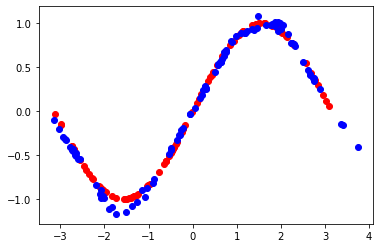

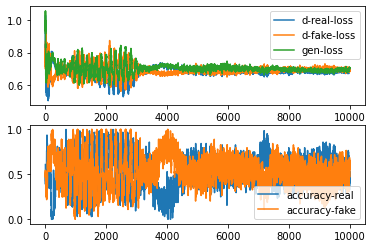

In [18]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)